# **Week 3**

## Univariate & Bivariate Analysis

In [2]:
import pandas as pd 
df = pd.read_csv("/Users/nishkarsh/Desktop/Infosys Internship/Week 2 /Updated_Dataset.csv")
df.head(9)

,Age,Age_Group,Gender,Avg_Daily_Screen_Time_hr,awareness,Primary_Device,Device_Category,Screen_Size,Exceeded_Recommended_Limit,Educational_to_Recreational_Ratio,Health_Impacts,Health_Impact_Category,Urban_or_Rural
0,14,Teenagers,Male,3.99,Need Attention,Smartphone,Portable,<30,True,0.42,"Poor Sleep, Eye Strain",Both Physical and Mental,Urban
1,11,Pre-teens,Female,4.61,Need Attention,Laptop,Portable,<30,True,0.30,Poor Sleep,Mental,Urban
2,18,Late teens,Female,3.73,Need Attention,TV,Wallmounted,>30,True,0.32,Poor Sleep,Mental,Urban
3,15,Teenagers,Female,1.21,No harm,Laptop,Portable,<30,False,0.39,No health impacts,No Impact,Urban
4,12,Pre-teens,Female,5.89,Need Attention,Smartphone,Portable,<30,True,0.49,"Poor Sleep, Anxiety",Mental,Urban
5,14,Teenagers,Female,4.88,Need Attention,Smartphone,Portable,<30,True,0.44,Poor Sleep,Mental,Urban
6,17,Late teens,Male,2.97,No harm,TV,Wallmounted,>30,False,0.48,No health impacts,No Impact,Rural
7,10,Pre-teens,Male,2.74,No harm,TV,Wallmounted,>30,True,0.54,No health impacts,No Impact,Urban
8,14,Teenagers,Male,4.61,Need Attention,Laptop,Portable,<30,True,0.36,"Poor Sleep, Anxiety",Mental,Rural


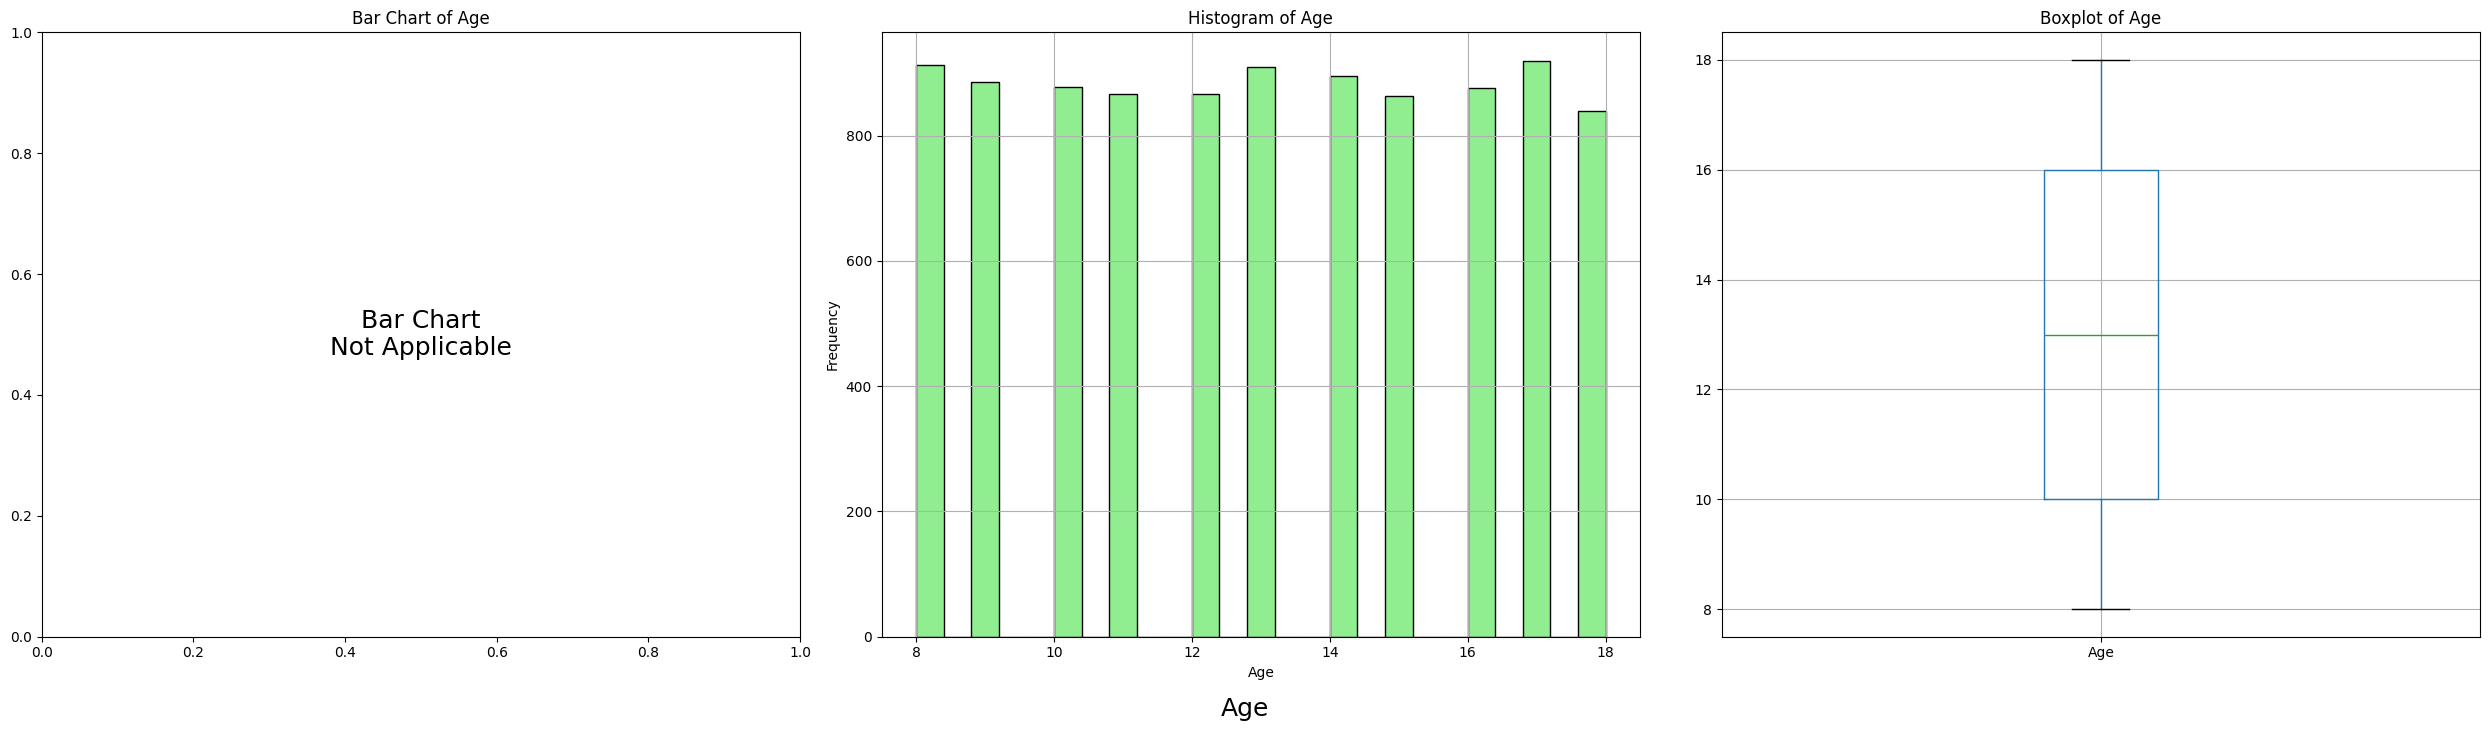

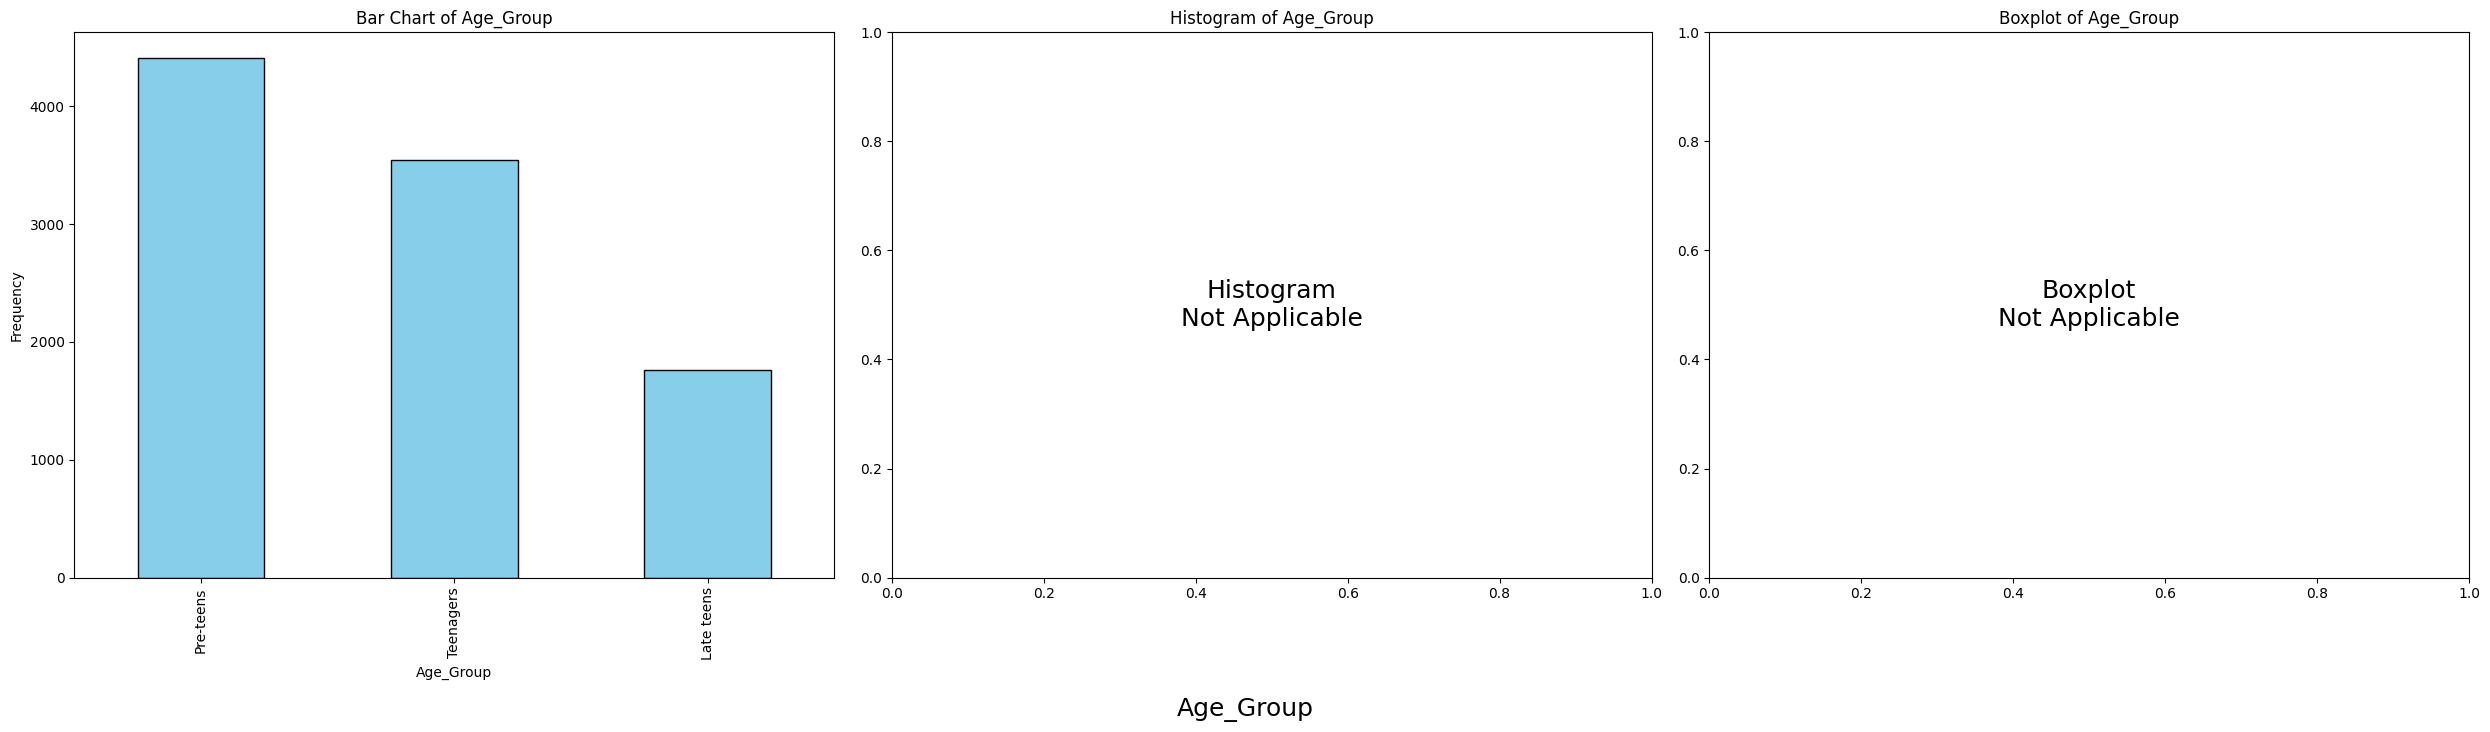

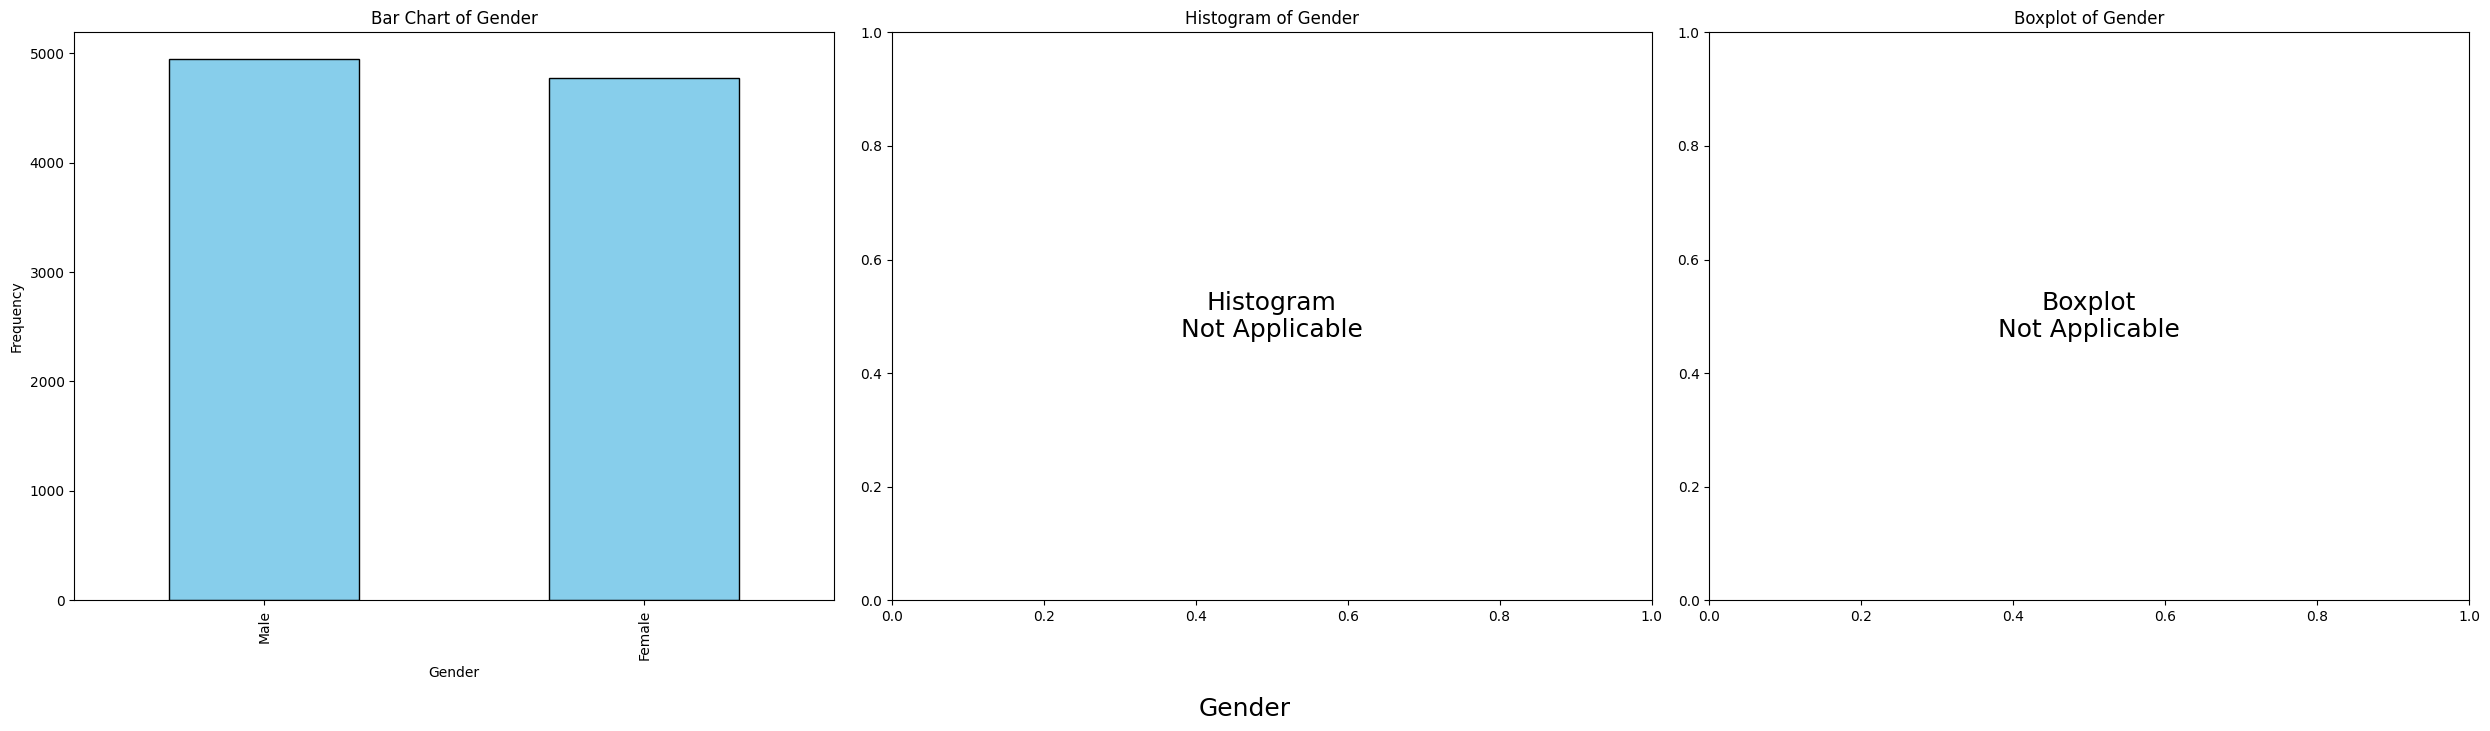

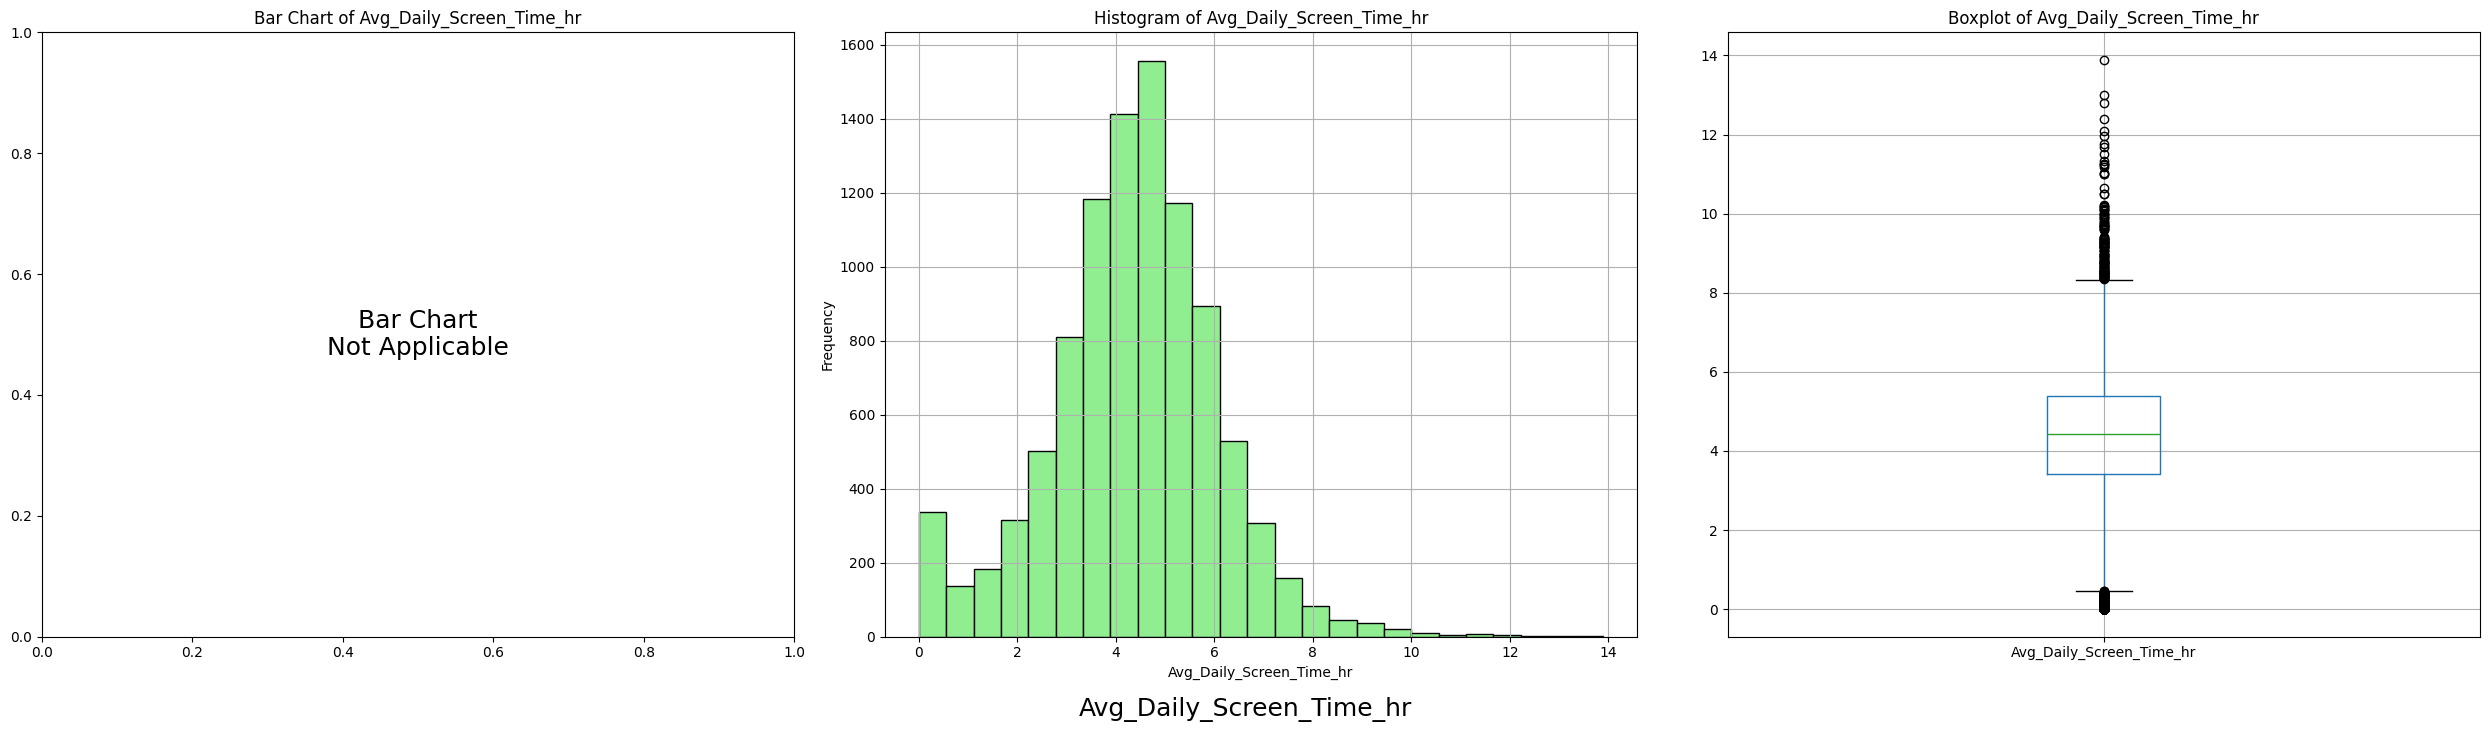

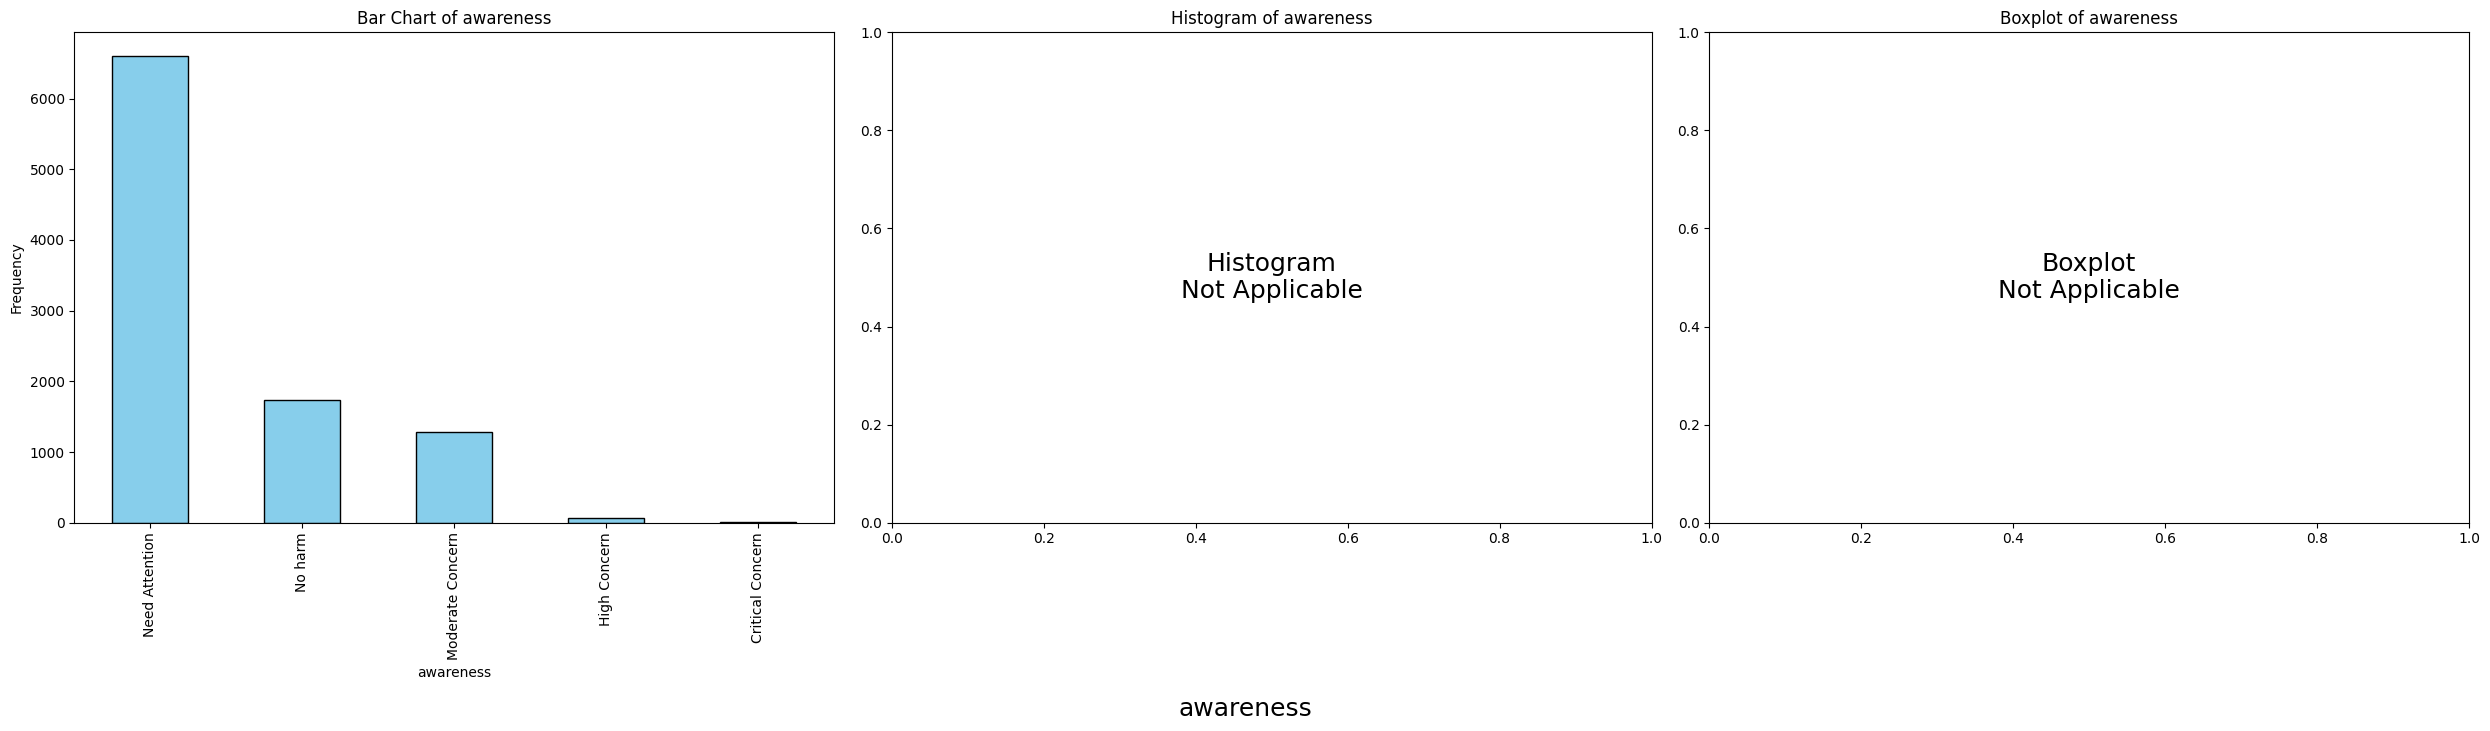

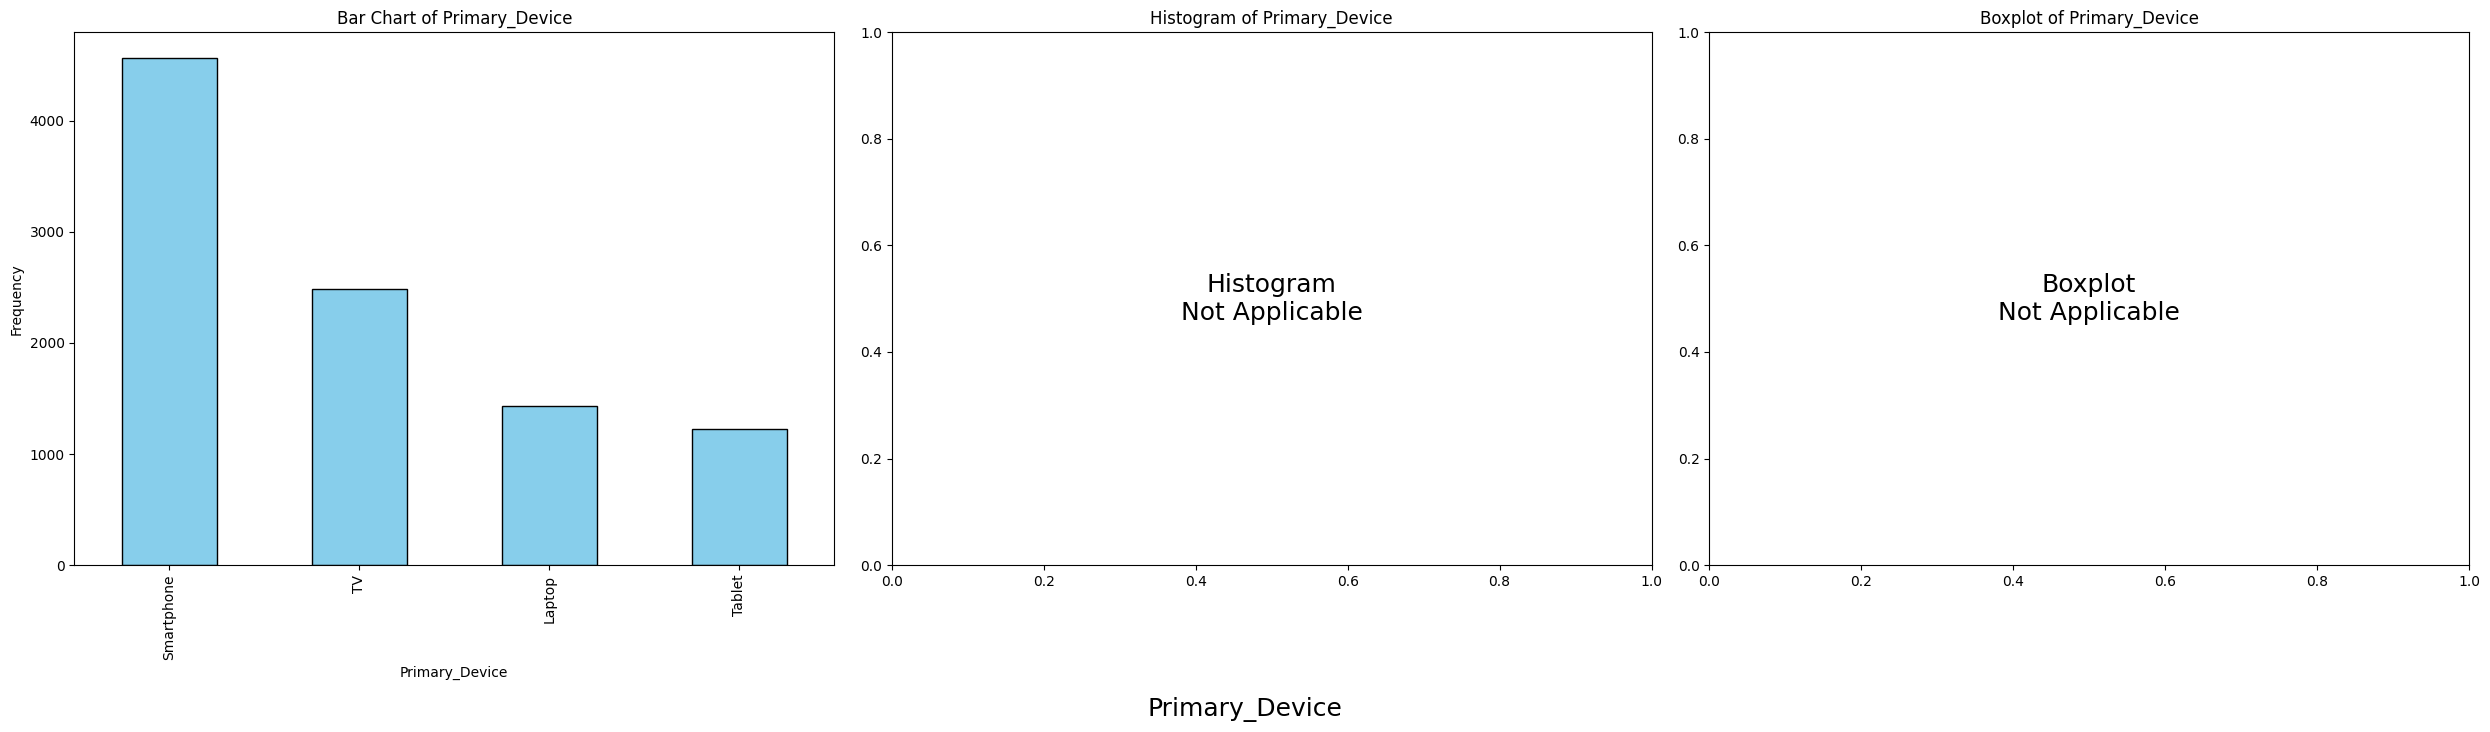

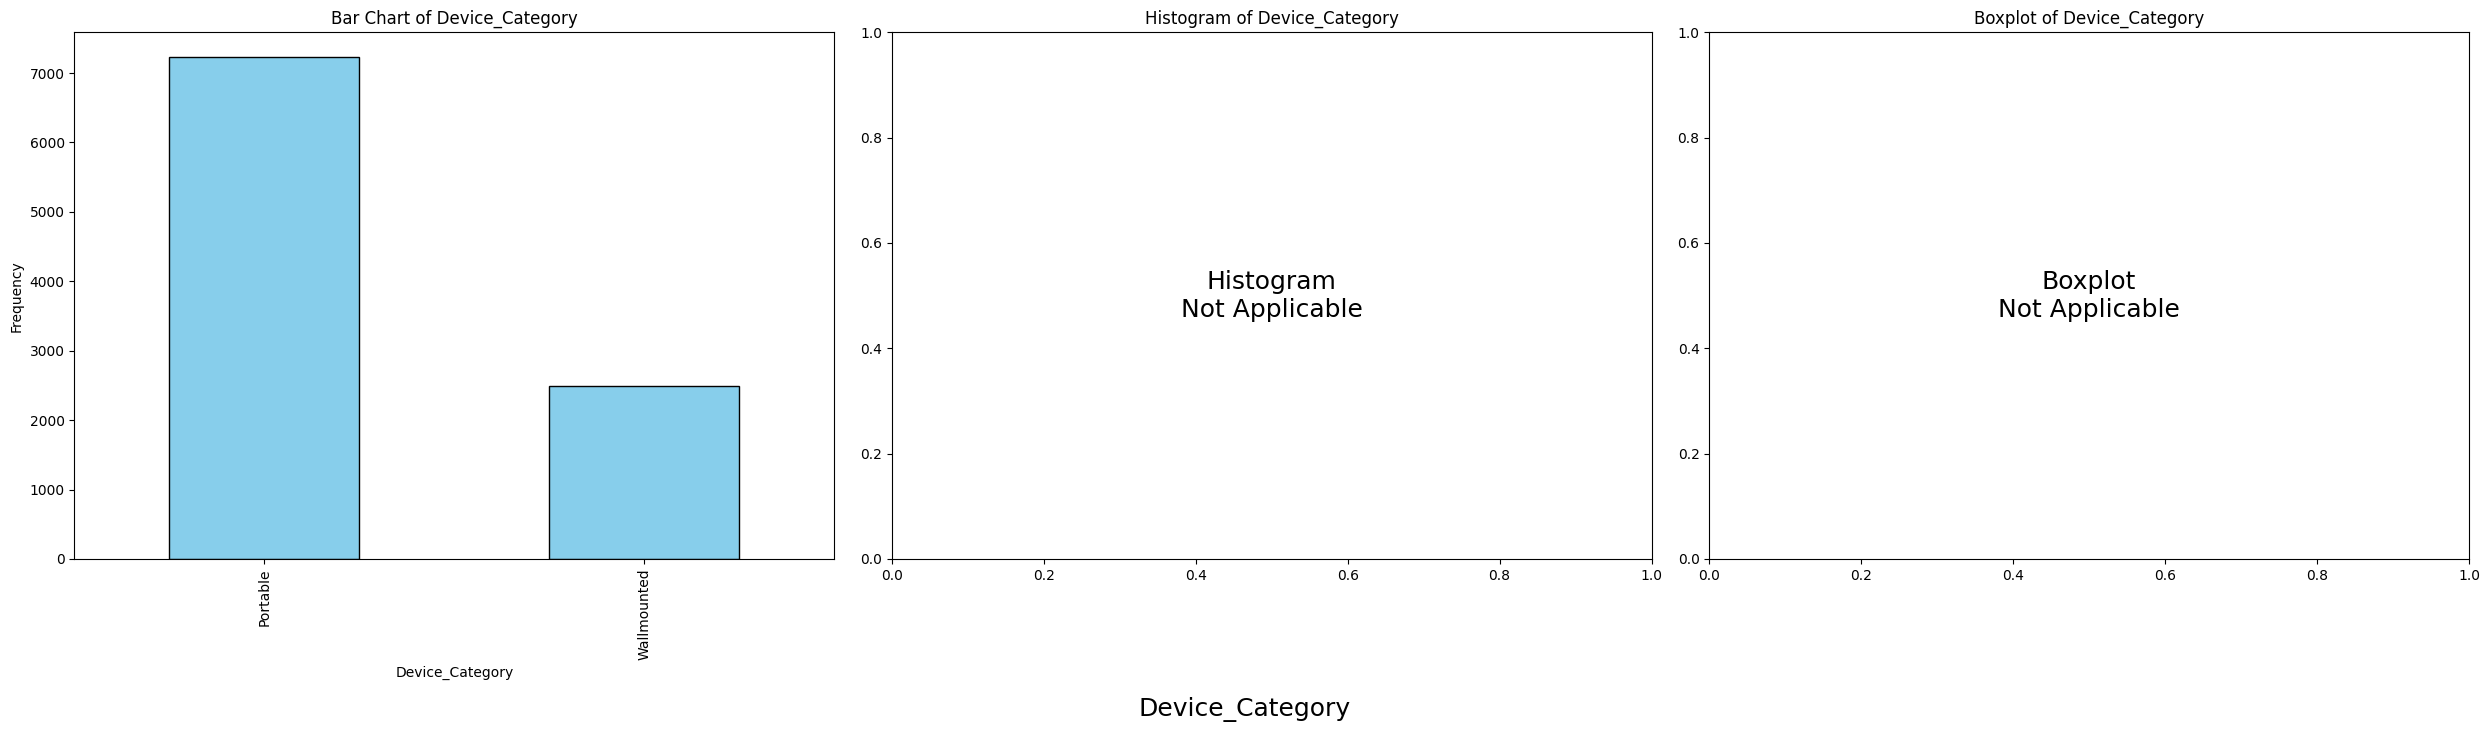

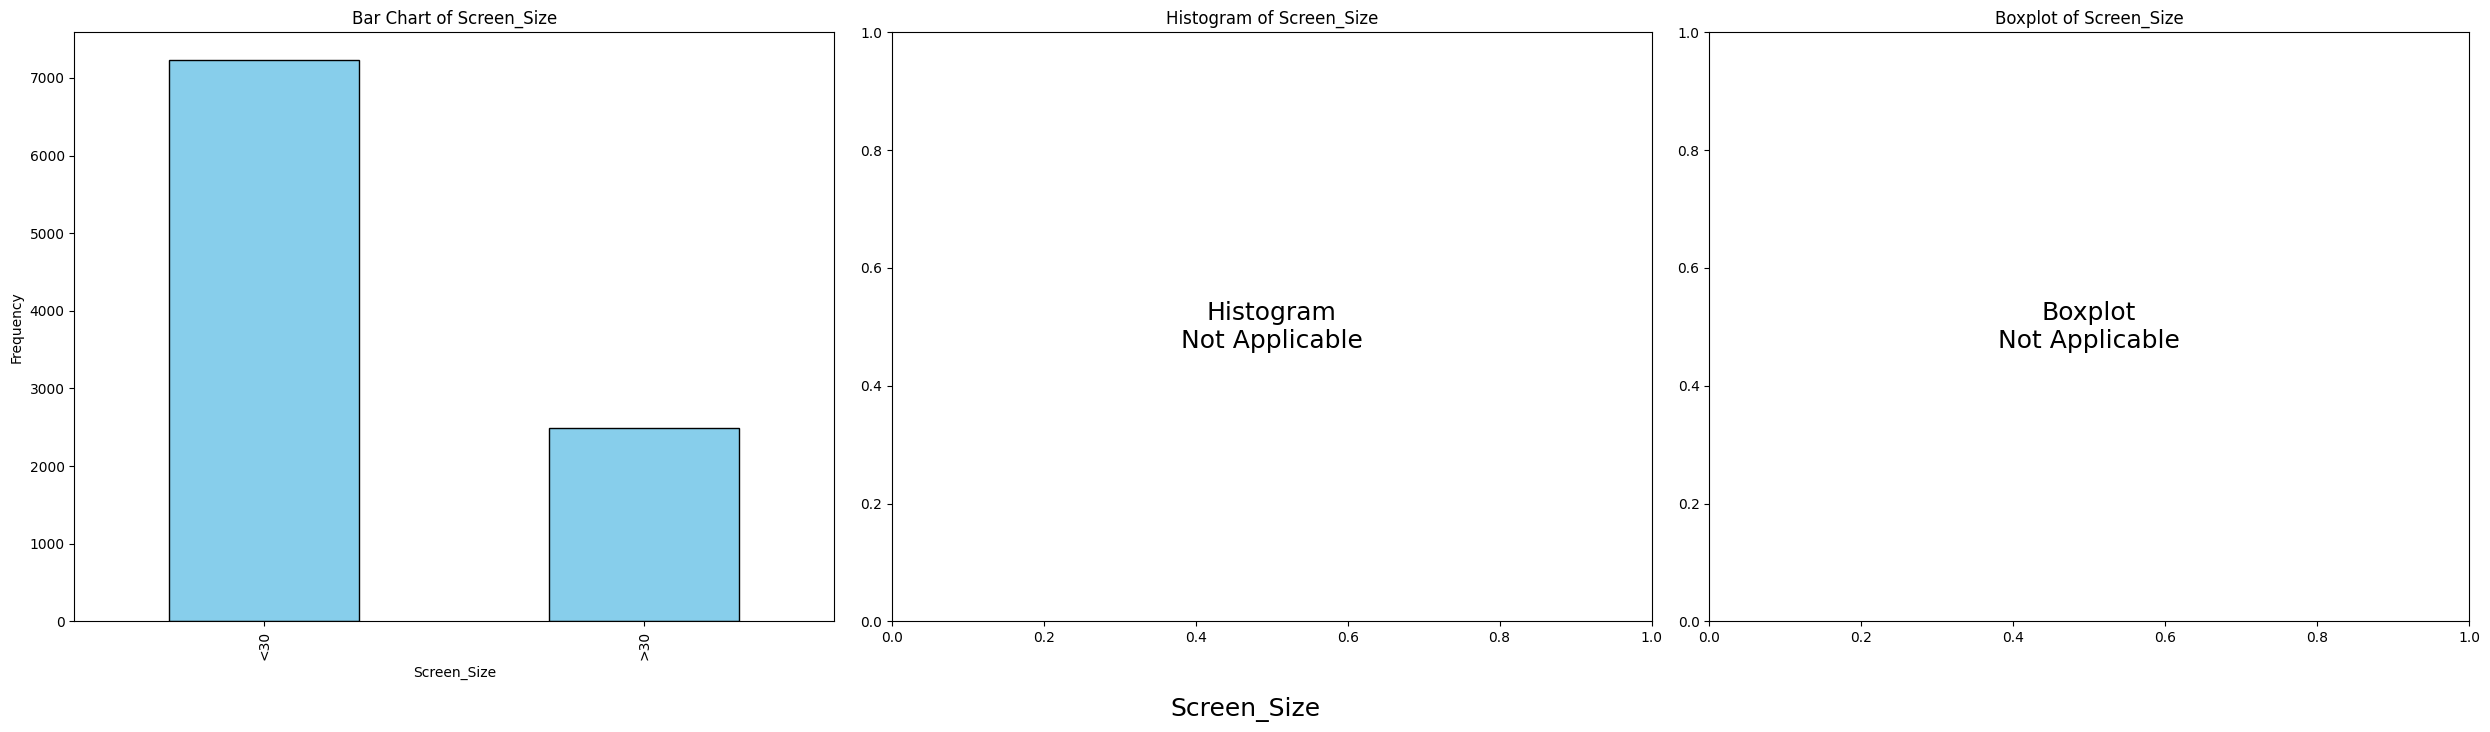

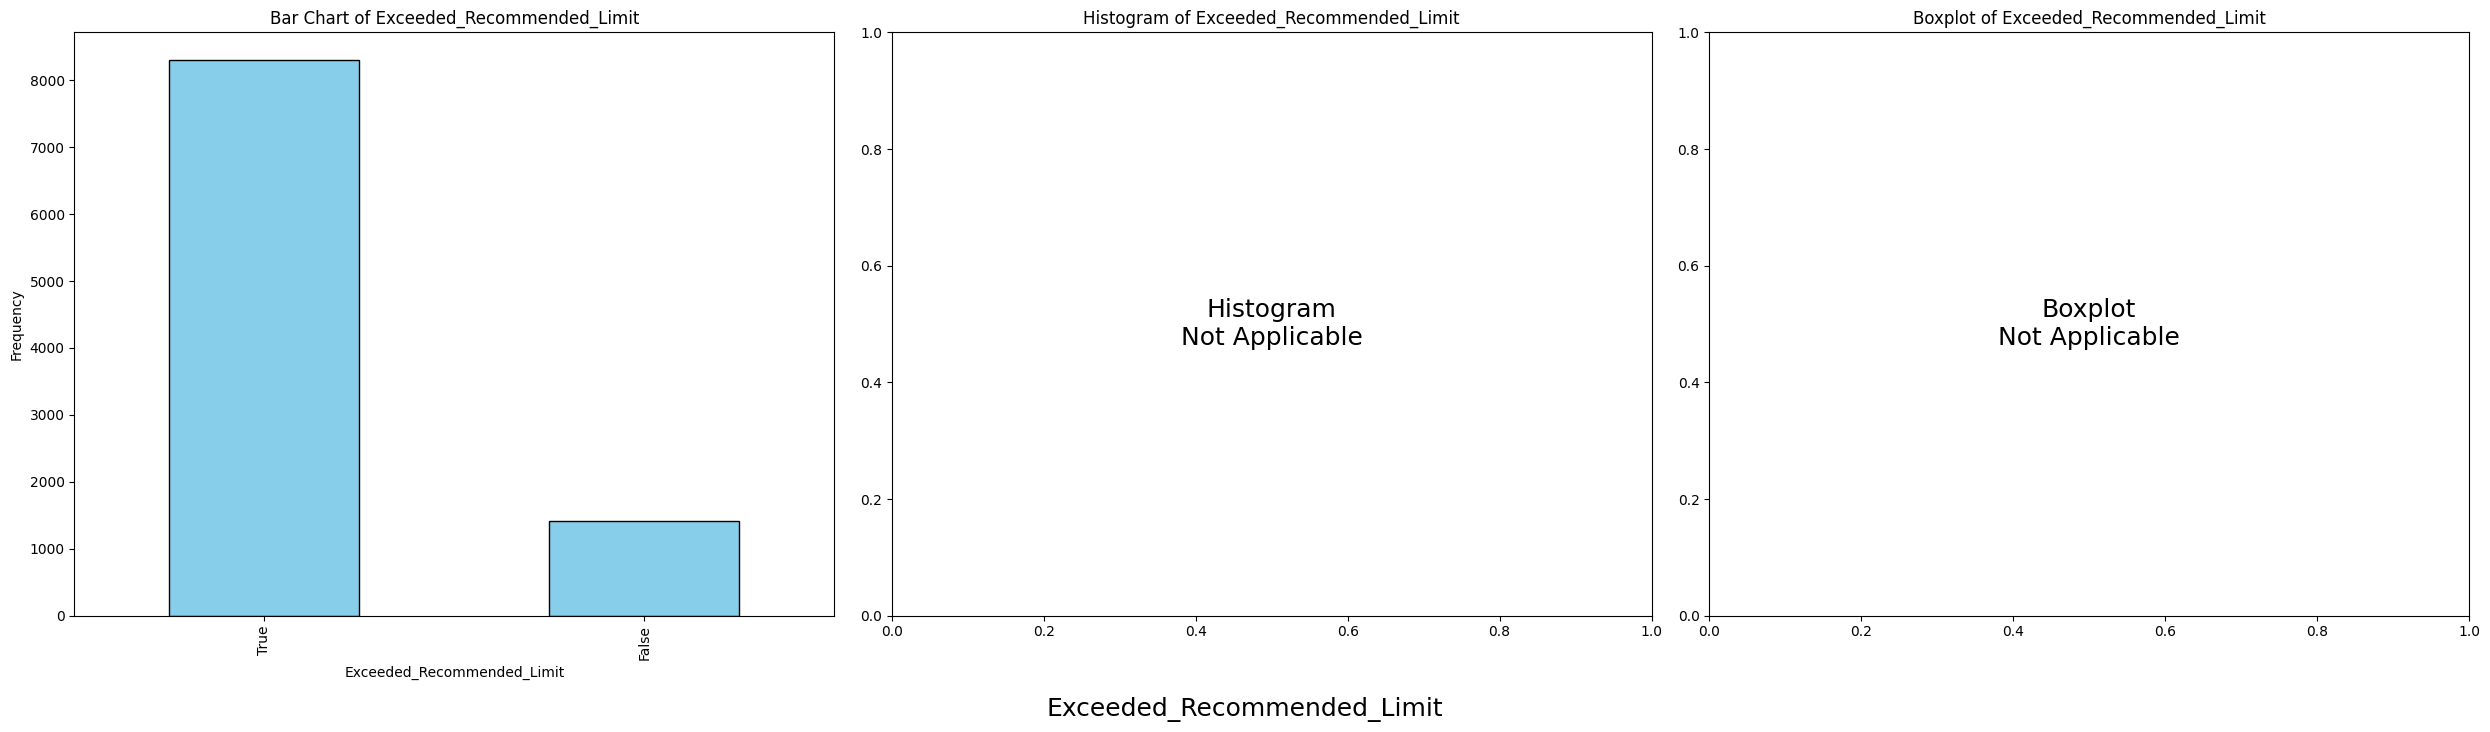

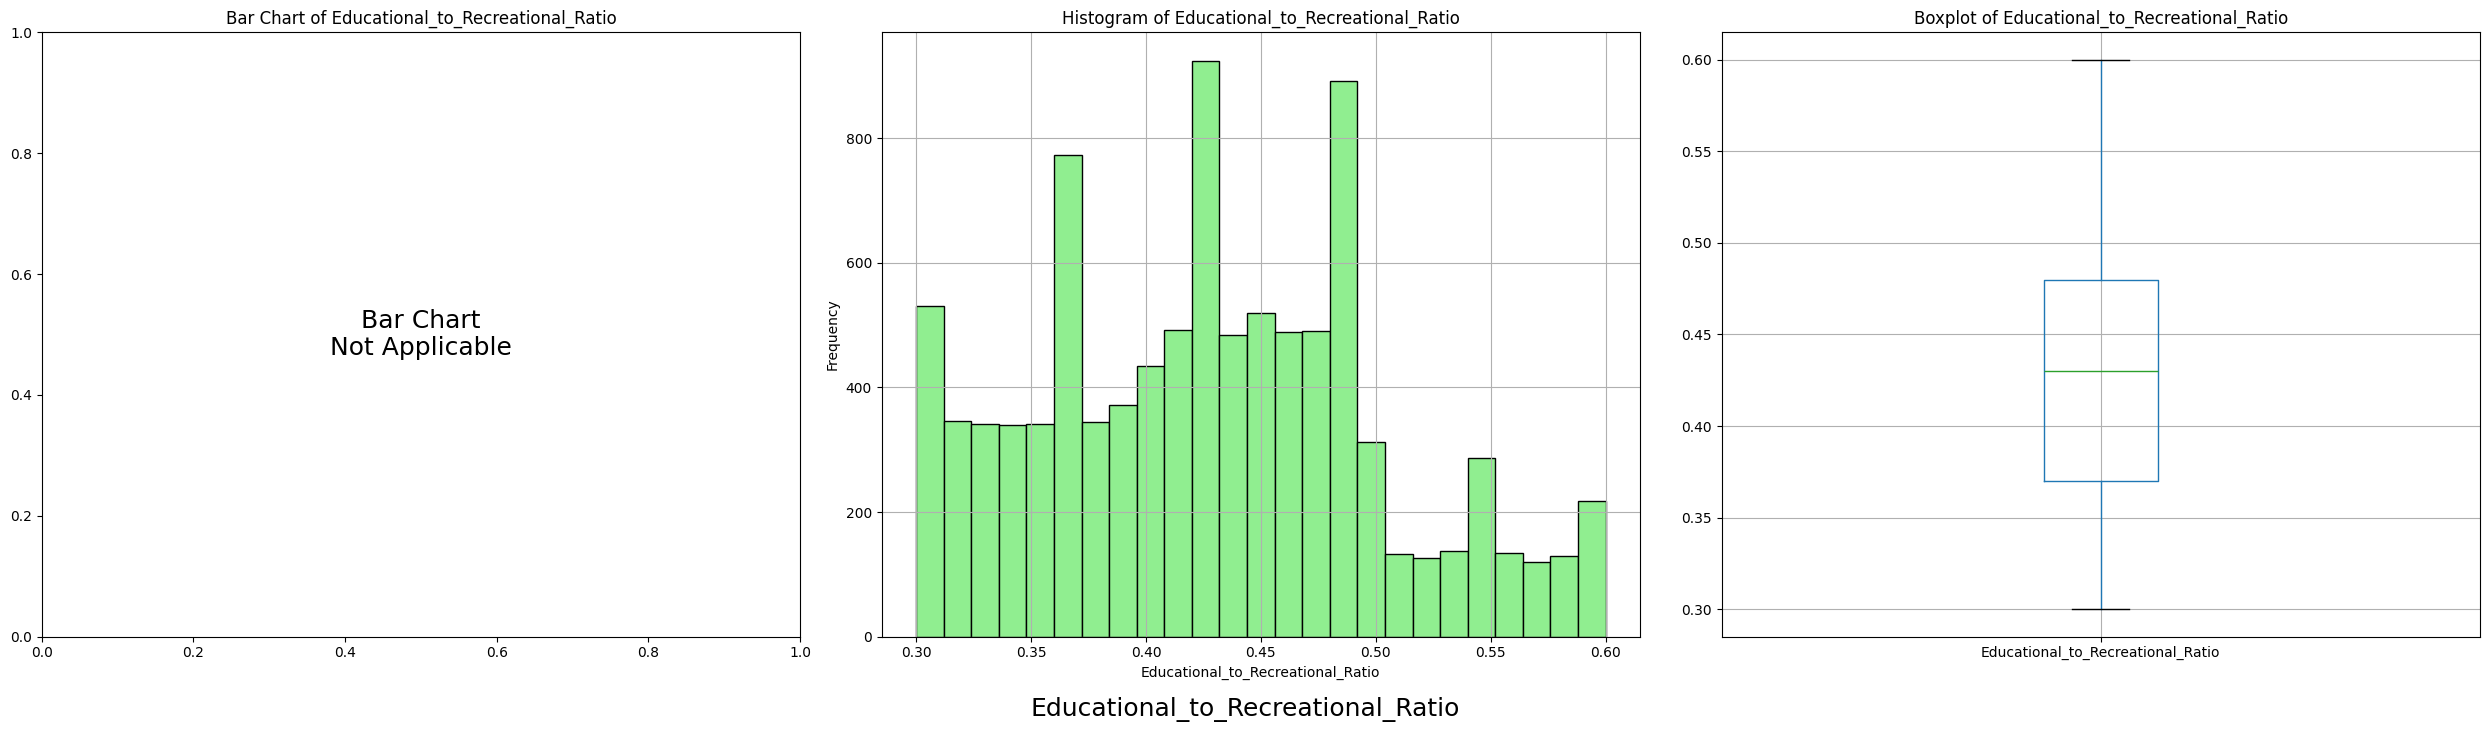

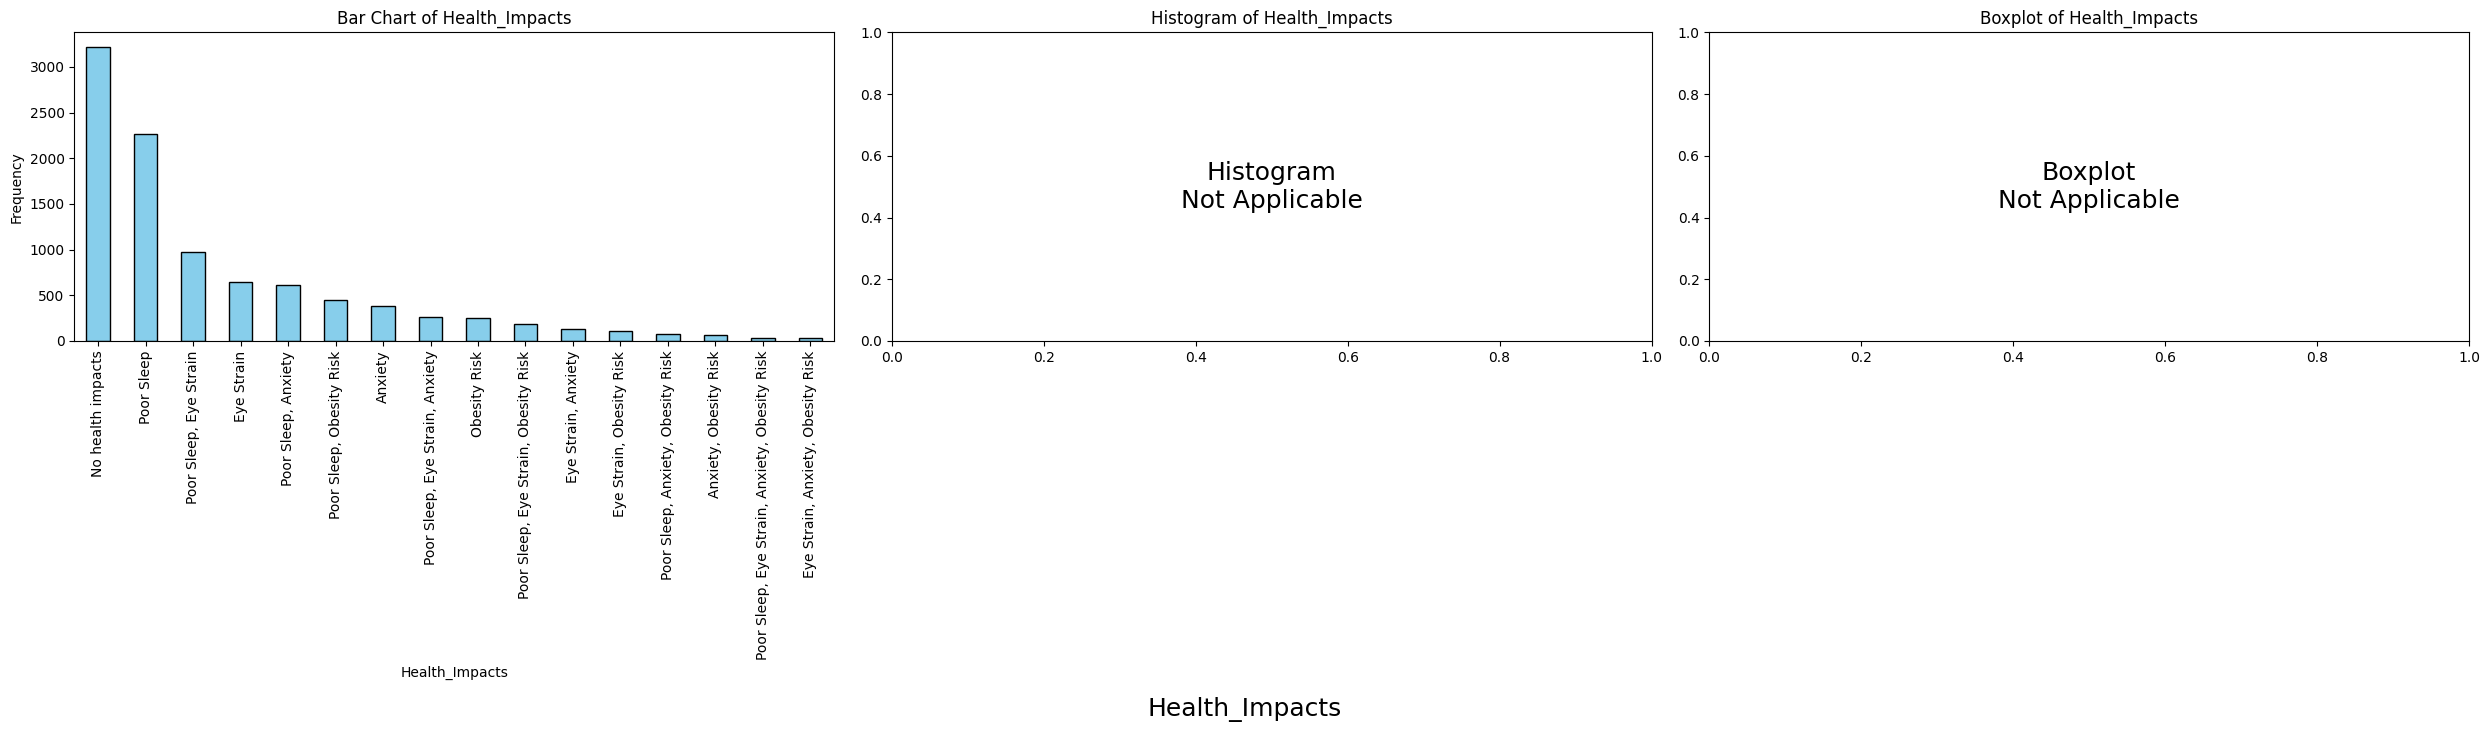

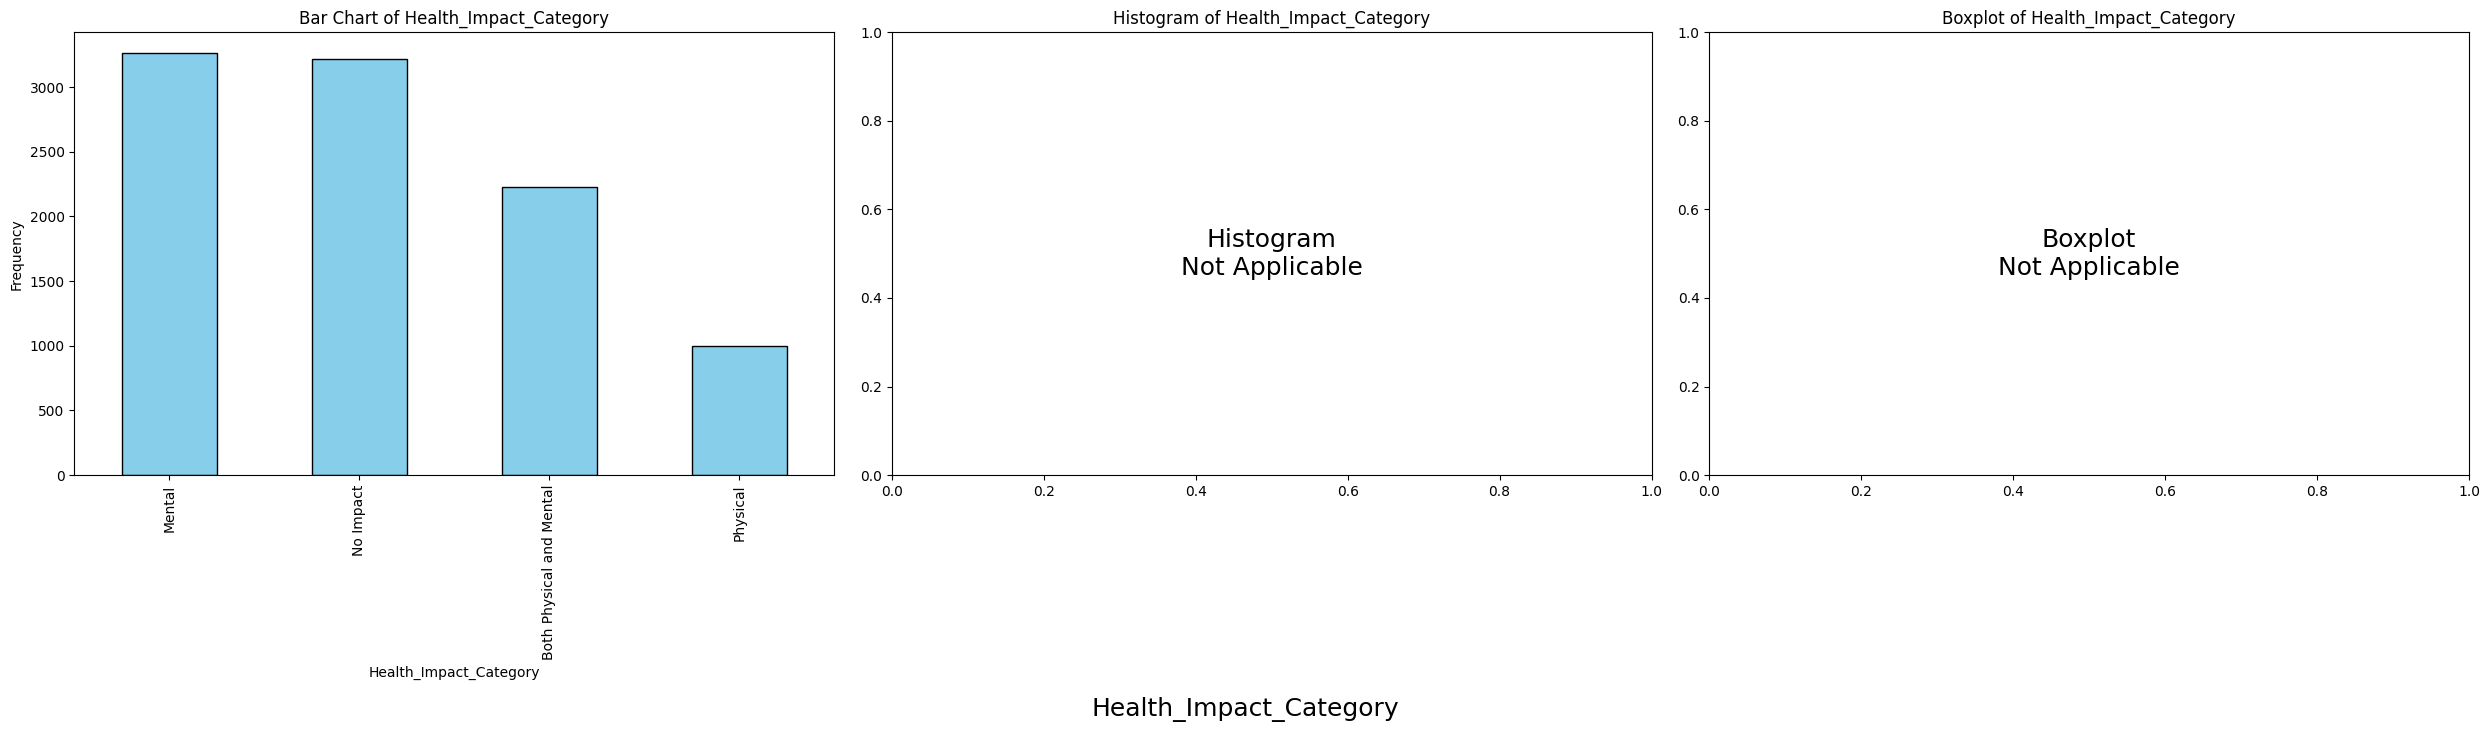

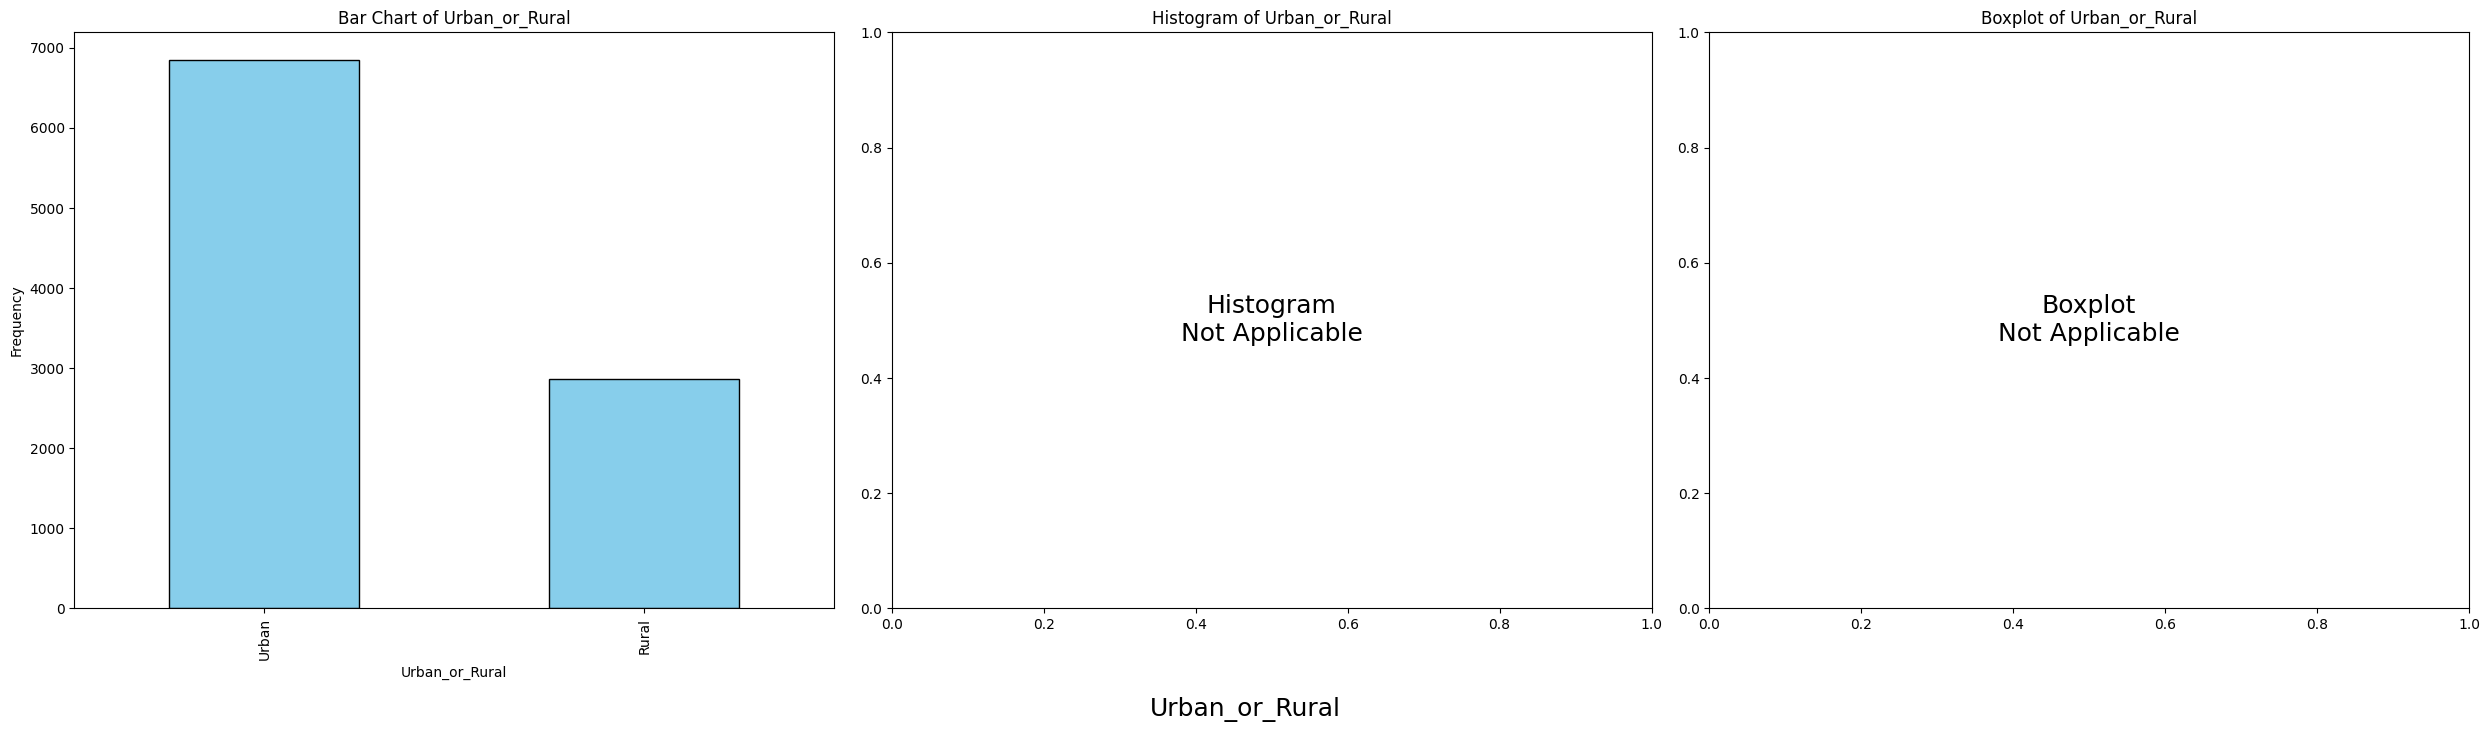

In [23]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Main univariate analysis loop for all columns
for column in df.columns:
    plt.figure(figsize=(25, 7))

    # Bar Chart (categorical & boolean columns)
    plt.subplot(1, 3, 1)
    if df[column].dtype == 'object' or df[column].dtype.name == 'category' or df[column].dtype == bool:
        df[column].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
        plt.title(f'Bar Chart of {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
    else:
        plt.text(0.5, 0.5, 'Bar Chart\nNot Applicable',
                 horizontalalignment='center', verticalalignment='center', fontsize=18)
        plt.title(f'Bar Chart of {column}')

    # Histogram (only for numeric columns that are not boolean)
    plt.subplot(1, 3, 2)
    if pd.api.types.is_numeric_dtype(df[column]) and not (df[column].dtype == bool or np.issubdtype(df[column].dtype, np.bool_)):
        df[column].hist(bins=25, edgecolor='black', color='lightgreen')
        plt.title(f'Histogram of {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
    else:
        plt.text(0.5, 0.5, 'Histogram\nNot Applicable',
                 horizontalalignment='center', verticalalignment='center', fontsize=18)
        plt.title(f'Histogram of {column}')

    # Boxplot (only for numeric columns that are not boolean)
    plt.subplot(1, 3, 3)
    if pd.api.types.is_numeric_dtype(df[column]) and not (df[column].dtype == bool or np.issubdtype(df[column].dtype, np.bool_)):
        df.boxplot(column=column)
        plt.title(f'Boxplot of {column}')
    else:
        plt.text(0.5, 0.5, 'Boxplot\nNot Applicable',
                 horizontalalignment='center', verticalalignment='center', fontsize=18)
        plt.title(f'Boxplot of {column}')

    plt.figtext(0.5, -0.03, column, ha='center', fontsize=18)
    plt.tight_layout()
    plt.show()








Plotting bivariate analysis for Gender


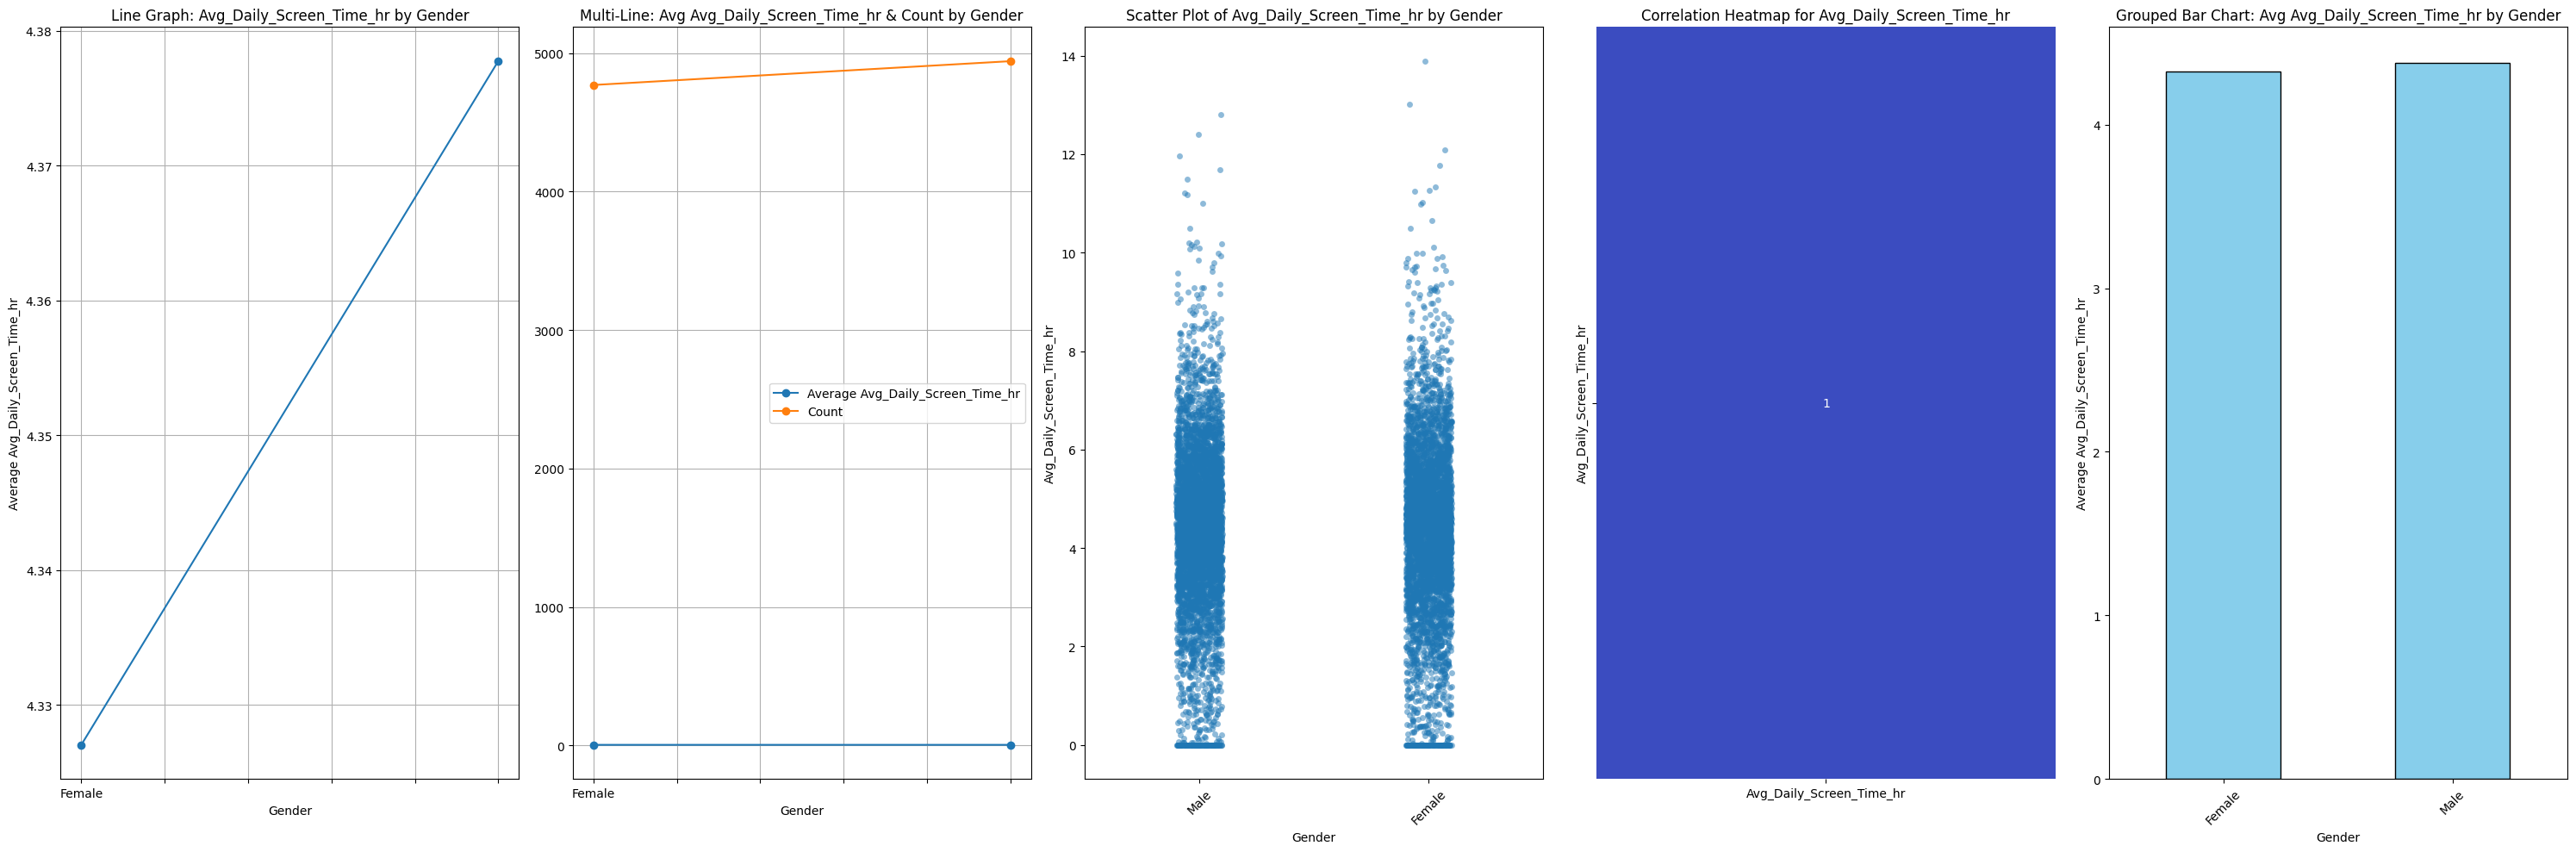

Plotting bivariate analysis for Age_Group


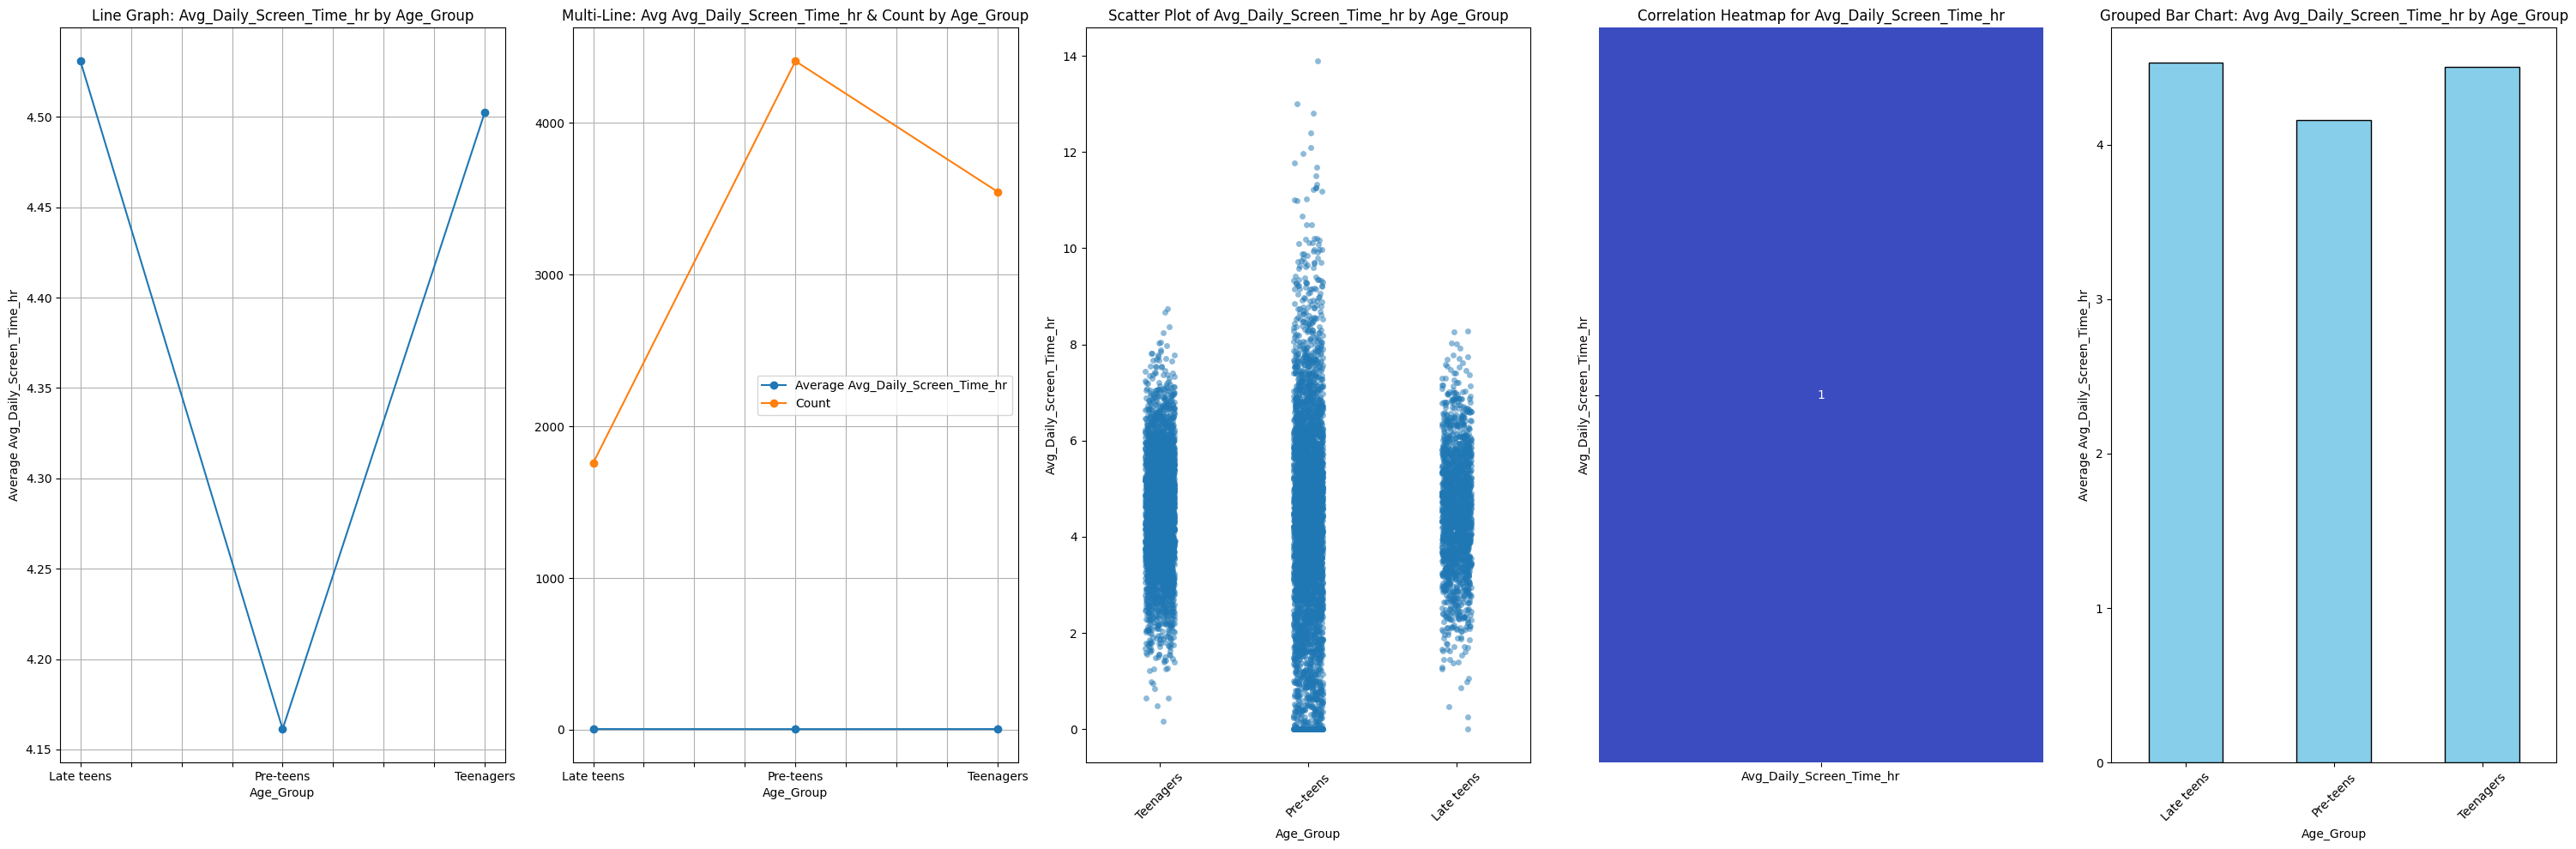

Plotting bivariate analysis for Urban_or_Rural


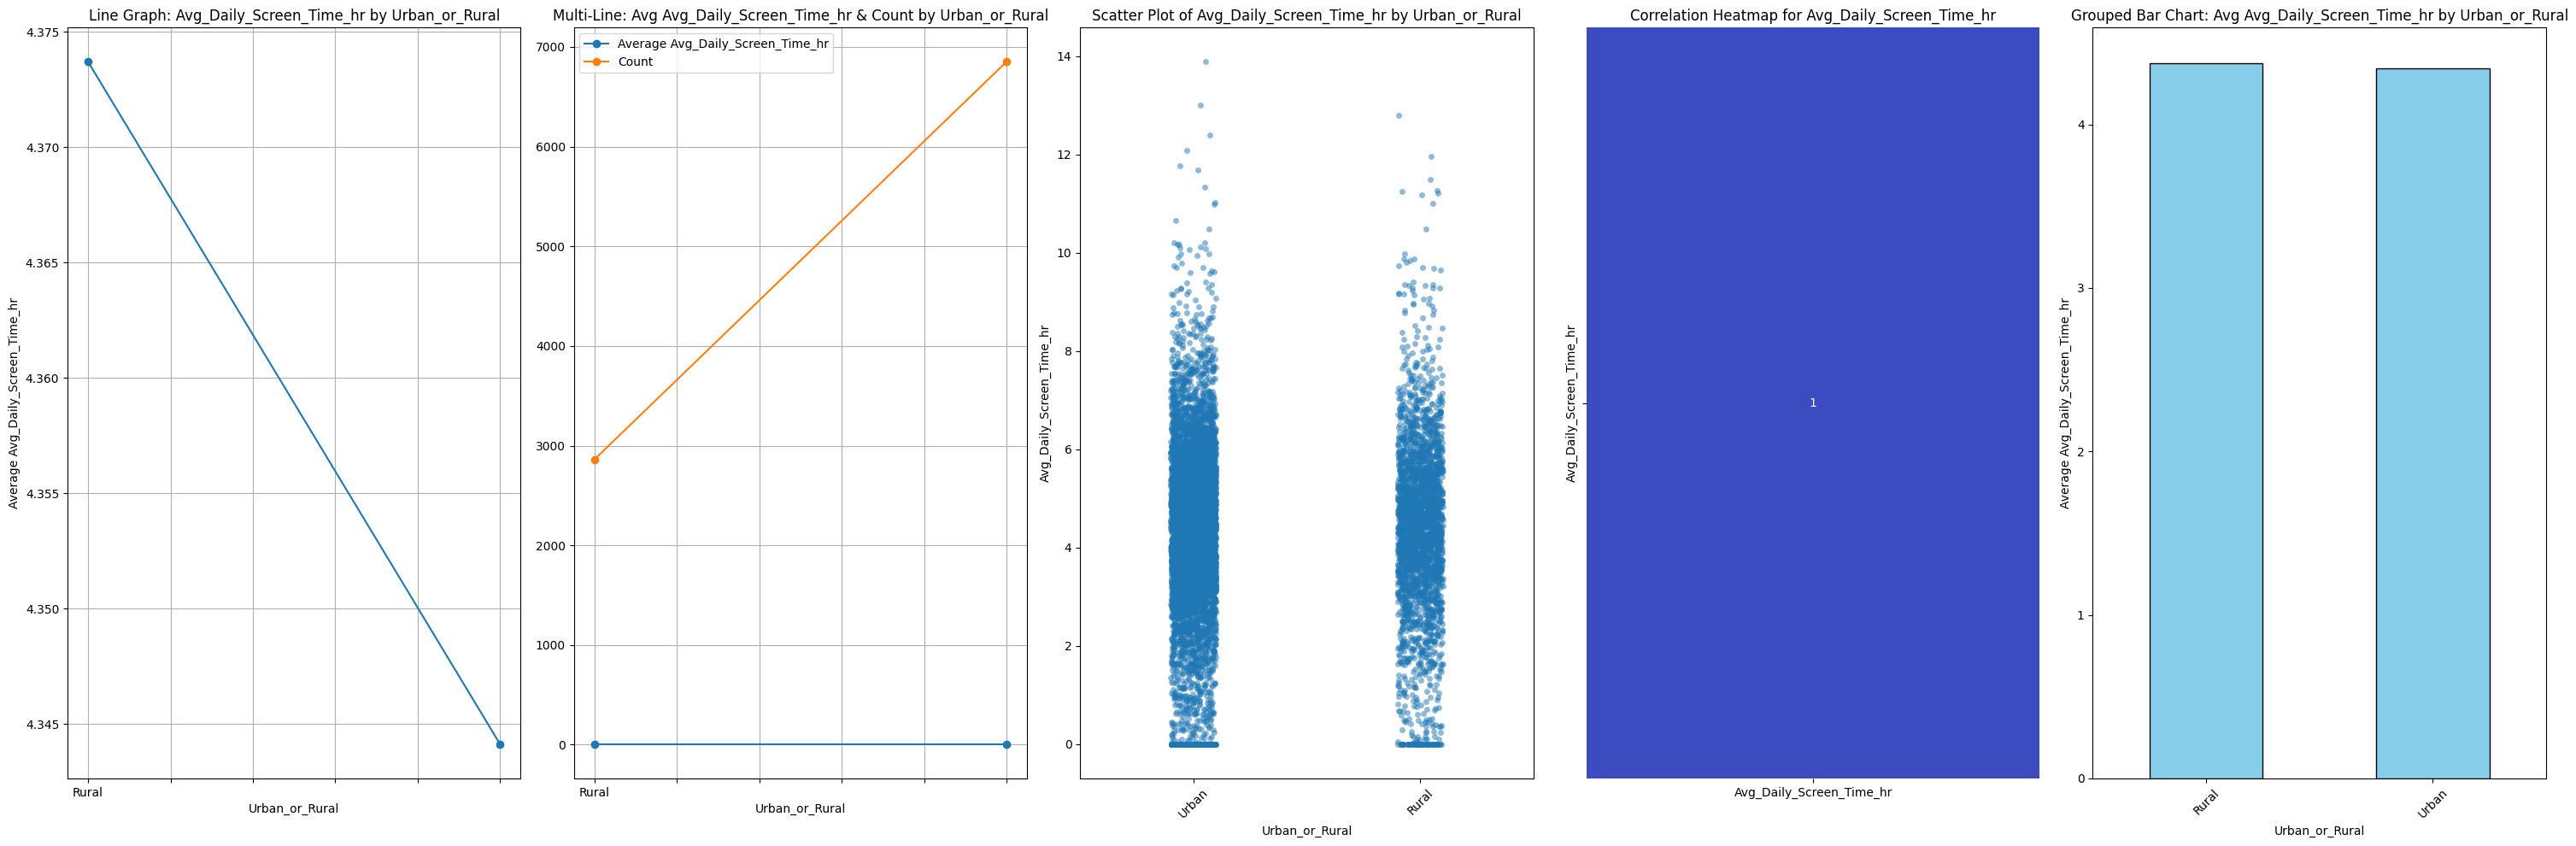

Plotting bivariate analysis for Device_Category


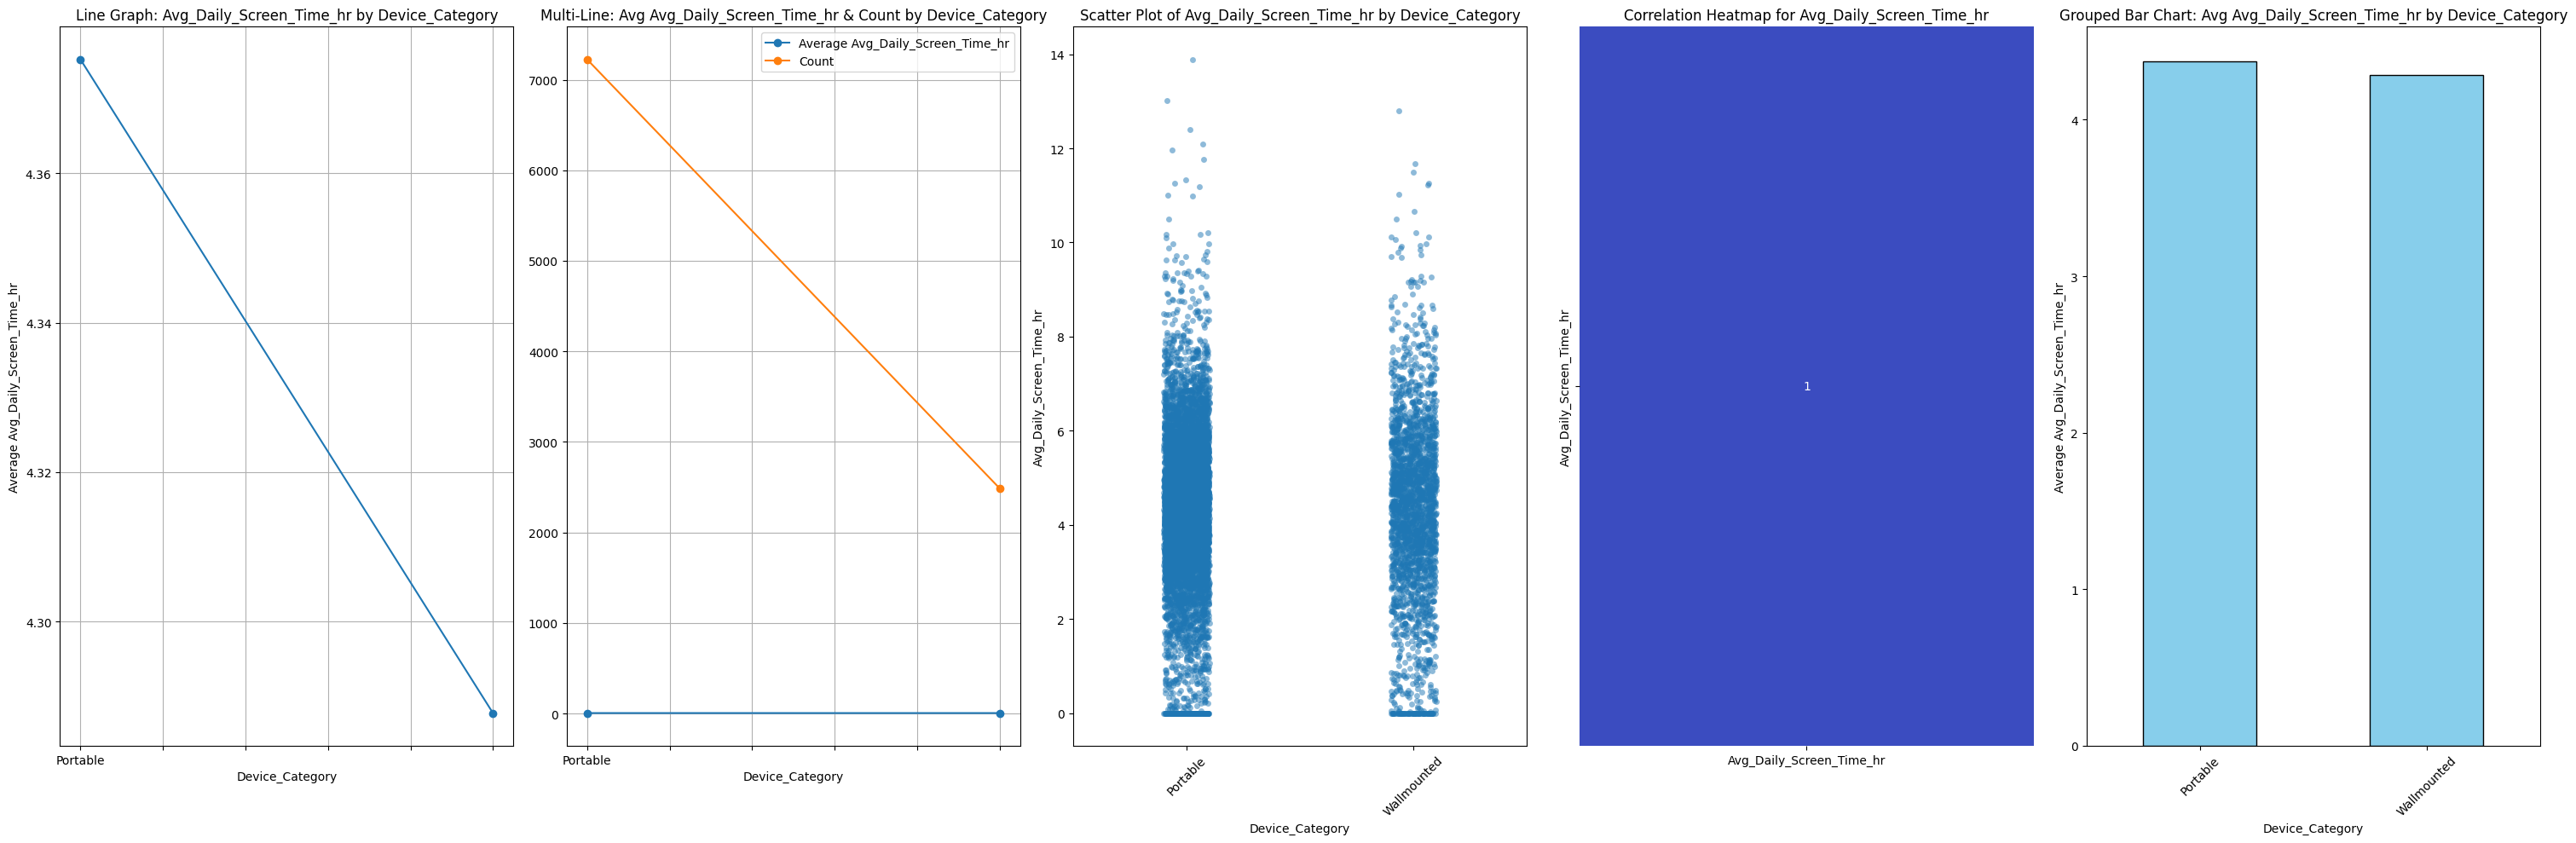

Plotting bivariate analysis for Health_Impact_Category


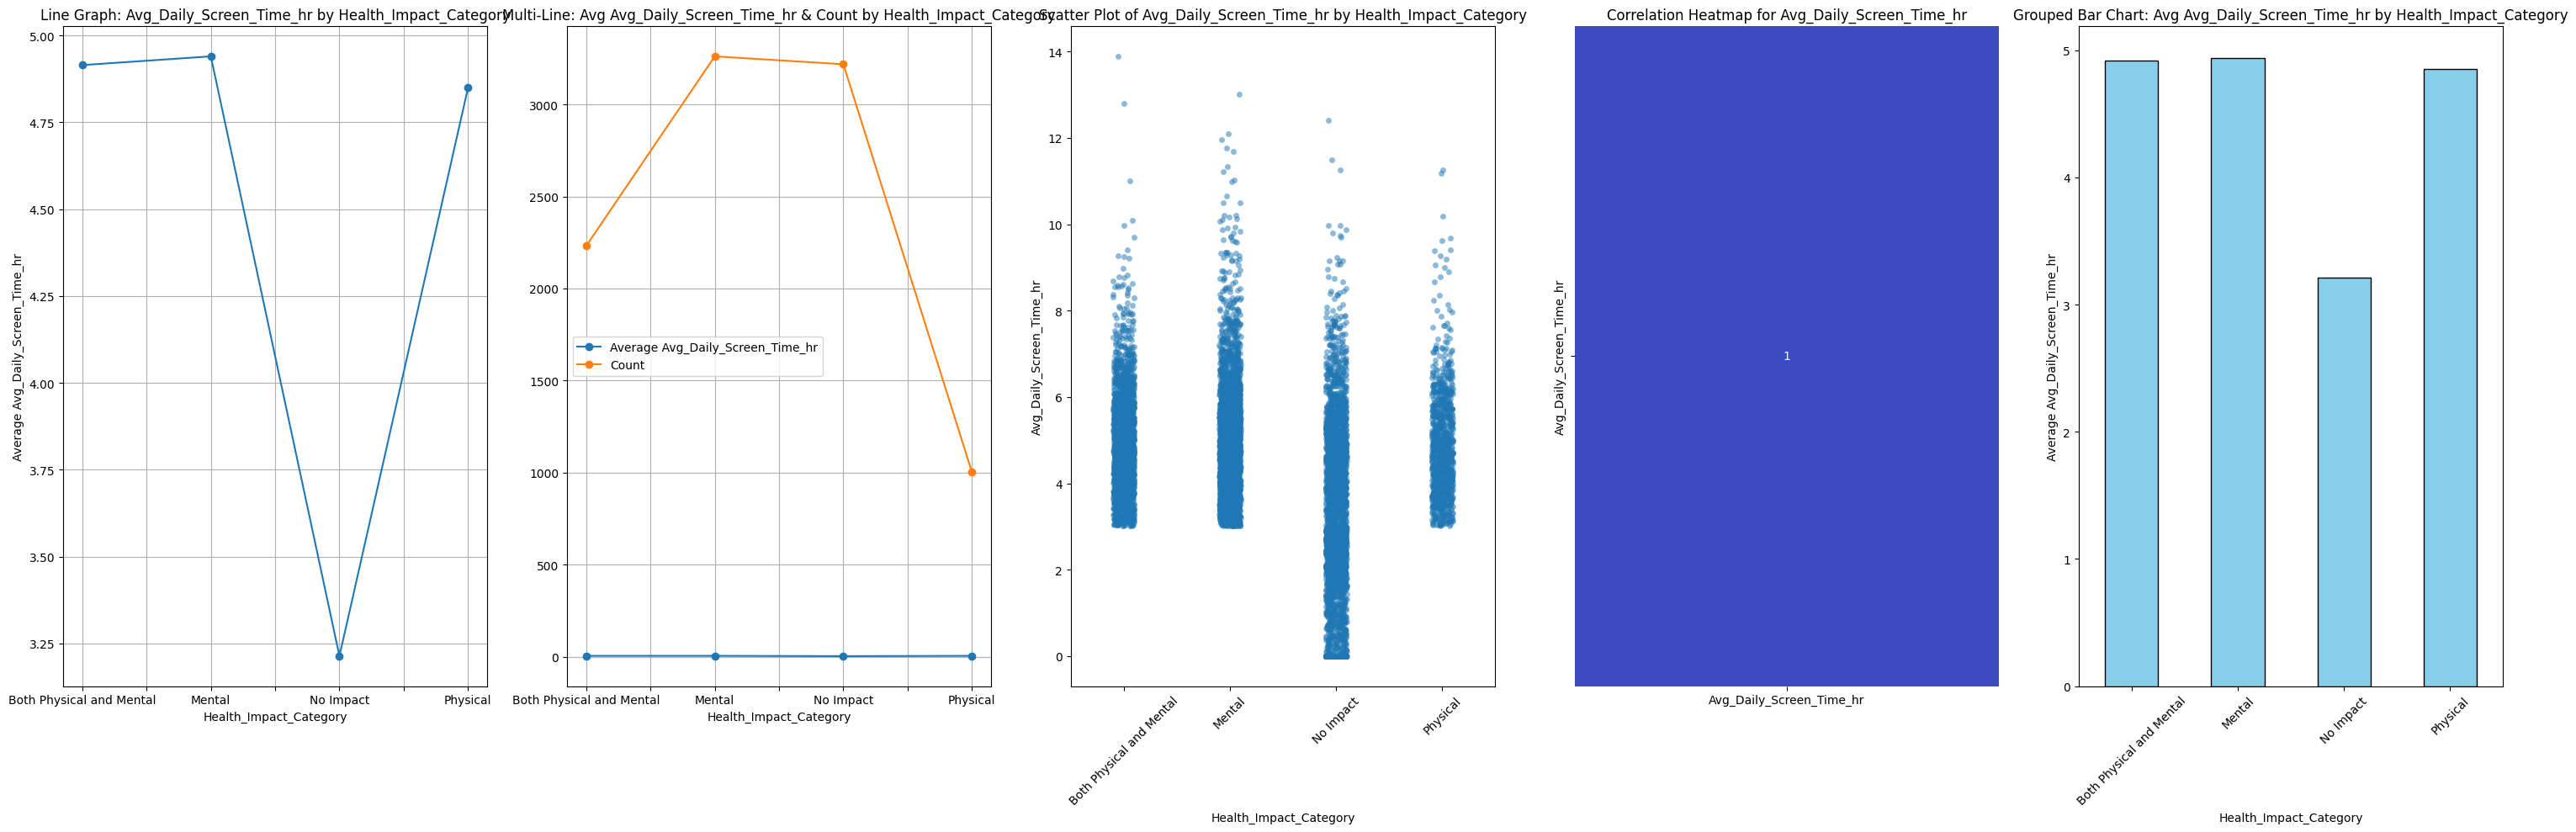

Plotting bivariate analysis for Primary_Device


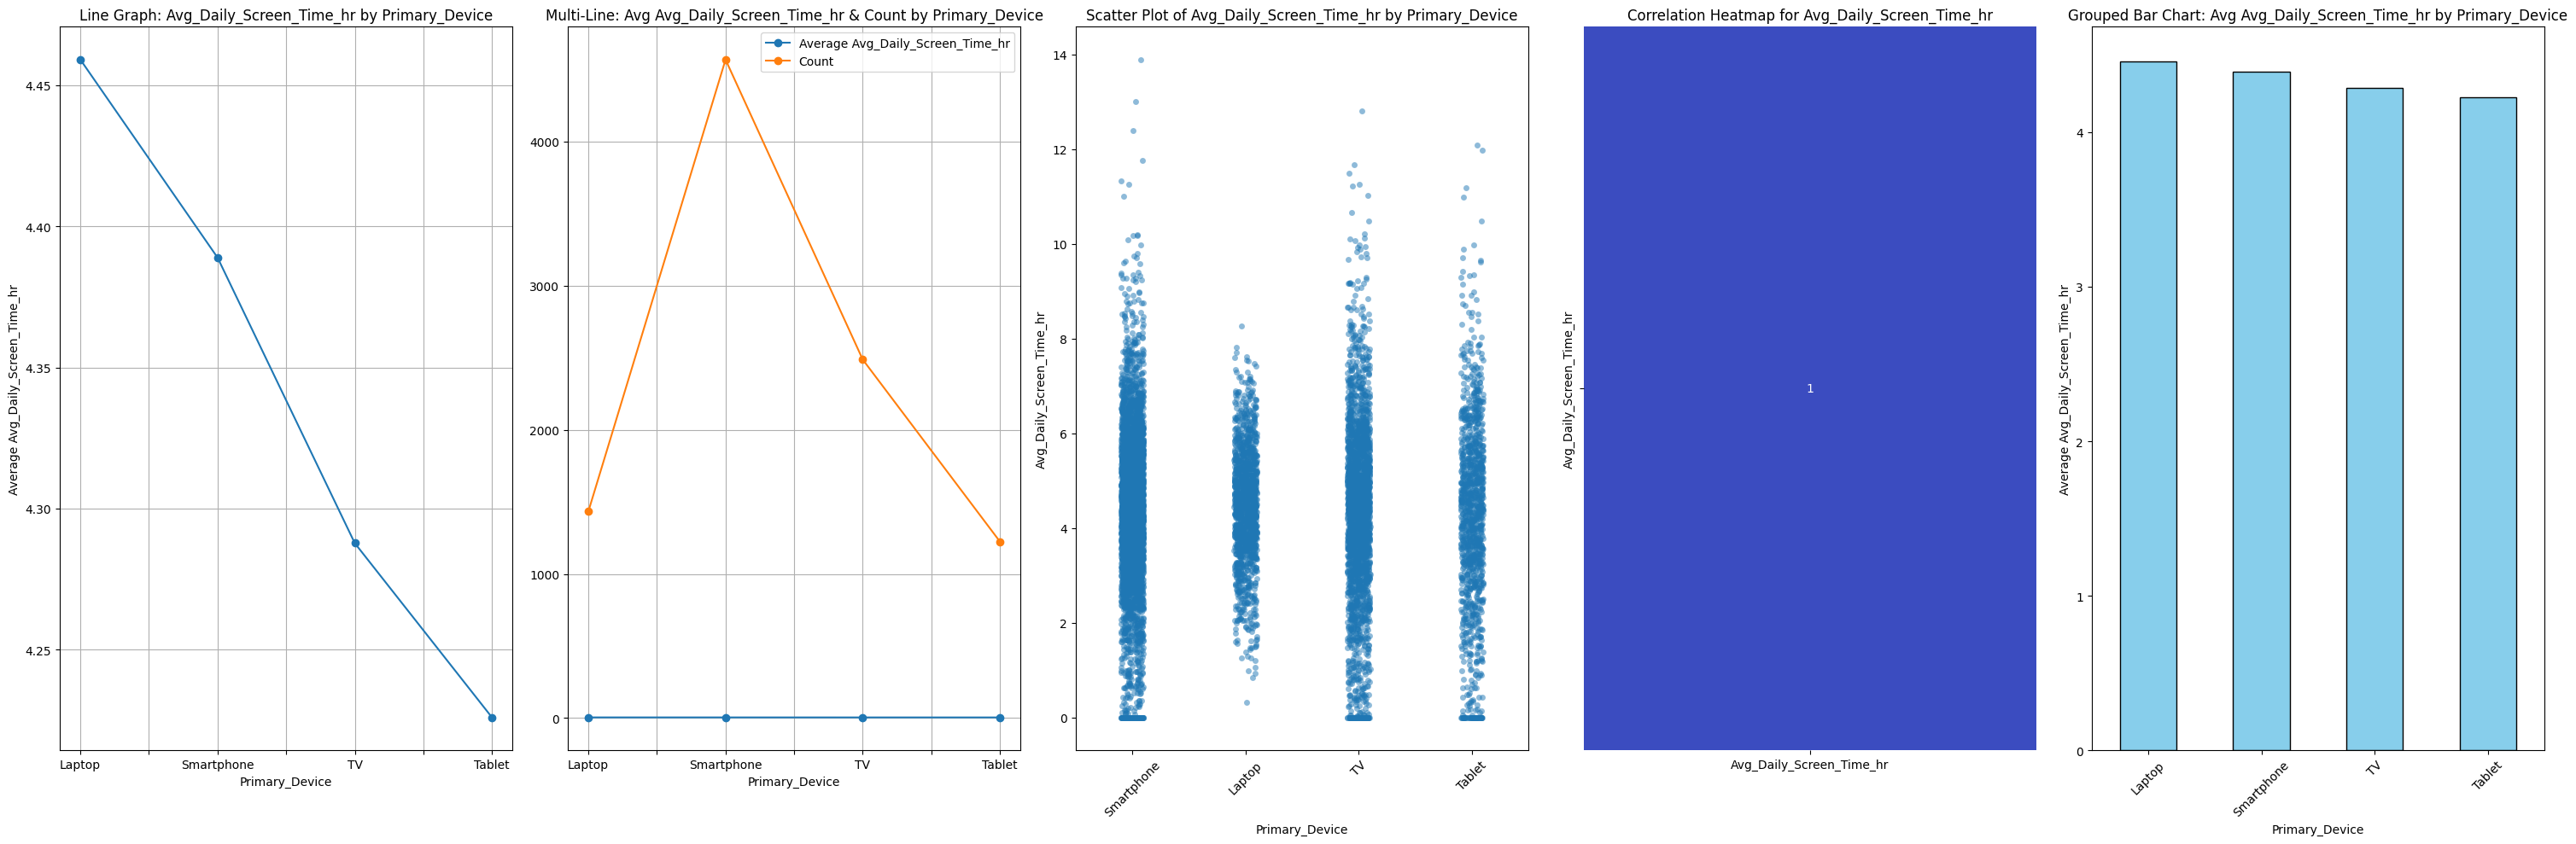

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Variables to analyze screen time against
bivariate_vars = ['Gender', 'Age_Group', 'Urban_or_Rural', 'Device_Category', 'Health_Impact_Category', 'Primary_Device']
numeric_var = 'Avg_Daily_Screen_Time_hr'

def plot_bivariate_analysis(df, cat_vars, num_var):
    for cat_var in cat_vars:
        print(f"Plotting bivariate analysis for {cat_var}")

        # Prepare aggregates
        avg_screen_time = df.groupby(cat_var)[num_var].mean()
        counts = df[cat_var].value_counts()

        plt.figure(figsize=(30, 10))

        # Line graph
        plt.subplot(1, 5, 1)
        avg_screen_time.plot(kind='line', marker='o', color='tab:blue')
        plt.title(f'Line Graph: {num_var} by {cat_var}')
        plt.xlabel(cat_var)
        plt.ylabel(f'Average {num_var}')
        plt.grid(True)

        # Multi-line graph (avg screen time and count)
        plt.subplot(1, 5, 2)
        combined_df = pd.DataFrame({
            f'Average {num_var}': avg_screen_time,
            'Count': counts
        })
        combined_df.plot(kind='line', marker='o', ax=plt.gca())
        plt.title(f'Multi-Line: Avg {num_var} & Count by {cat_var}')
        plt.xlabel(cat_var)
        plt.grid(True)

        # Scatter plot of individual data points
        plt.subplot(1, 5, 3)
        sns.stripplot(x=cat_var, y=num_var, data=df, jitter=True, alpha=0.5)
        plt.title(f'Scatter Plot of {num_var} by {cat_var}')
        plt.xlabel(cat_var)
        plt.ylabel(num_var)
        plt.xticks(rotation=45)

        # Heatmap of correlation (dummy as single number, shown for completeness)
        plt.subplot(1, 5, 4)
        corr_df = df[[num_var]].copy()
        corr = corr_df.corr()
        sns.heatmap(corr, annot=True, cmap='coolwarm', cbar=False)
        plt.title(f'Correlation Heatmap for {num_var}')

        # Grouped bar chart of average screen time per category
        plt.subplot(1, 5, 5)
        avg_screen_time.plot(kind='bar', color='skyblue', edgecolor='black')
        plt.title(f'Grouped Bar Chart: Avg {num_var} by {cat_var}')
        plt.xlabel(cat_var)
        plt.ylabel(f'Average {num_var}')
        plt.xticks(rotation=45)

        plt.tight_layout()
        plt.show()

# Run plotting function on dataset
plot_bivariate_analysis(df, bivariate_vars, numeric_var)



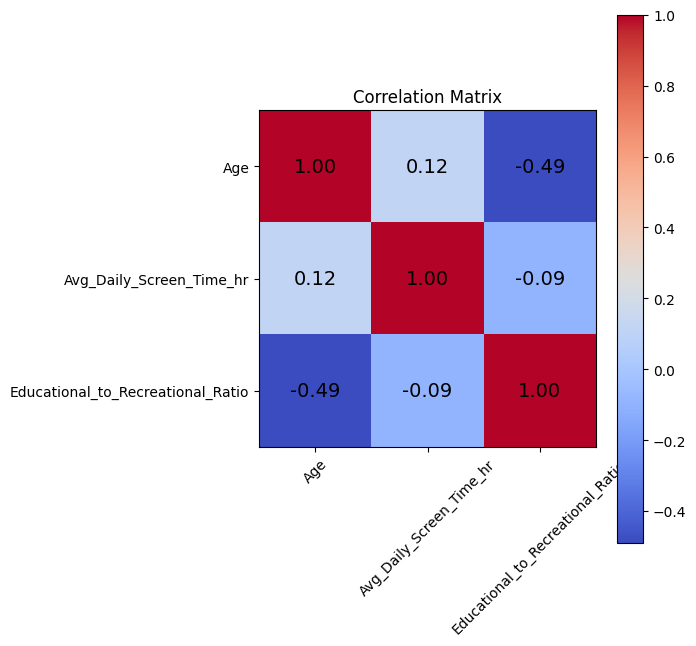

In [26]:
import numpy as np

# Correlation Heatmap with numbers
corr = df[['Age','Avg_Daily_Screen_Time_hr','Educational_to_Recreational_Ratio']].corr()
plt.figure(figsize=(7, 7))
plt.imshow(corr, cmap="coolwarm")
plt.xticks(range(len(corr)), corr.columns, rotation=45)
plt.yticks(range(len(corr)), corr.columns)
plt.colorbar()
plt.title("Correlation Matrix")

# Add correlation coefficient numbers in each cell
for i in range(len(corr.columns)):
    for j in range(len(corr.columns)):
        plt.text(j, i, f"{corr.iloc[i, j]:.2f}", ha='center', va='center', color='black', fontsize=14)

plt.tight_layout()
plt.show()
